<a href="https://colab.research.google.com/github/Rajasri1011-v/task7/blob/main/sir6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task7




Load the "breast-cancer.csv" dataset.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('breast-cancer.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'breast-cancer.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'breast-cancer.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Shape of the DataFrame: (569, 32)

Data types of each column:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           

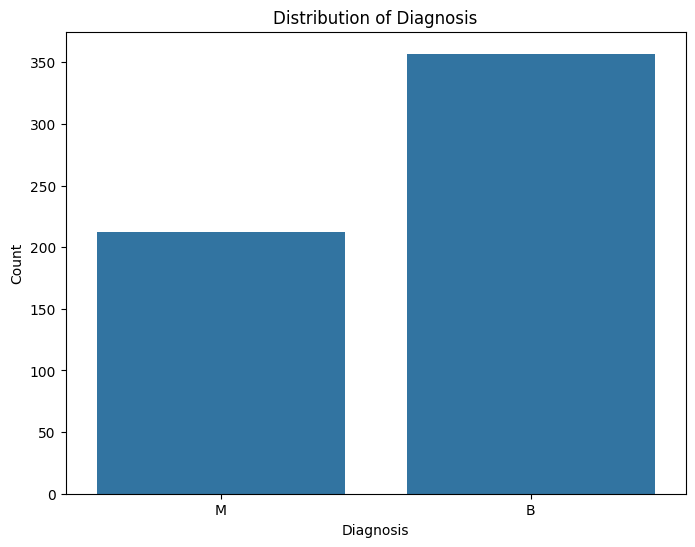


Descriptive statistics for numerical features:
        radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380 

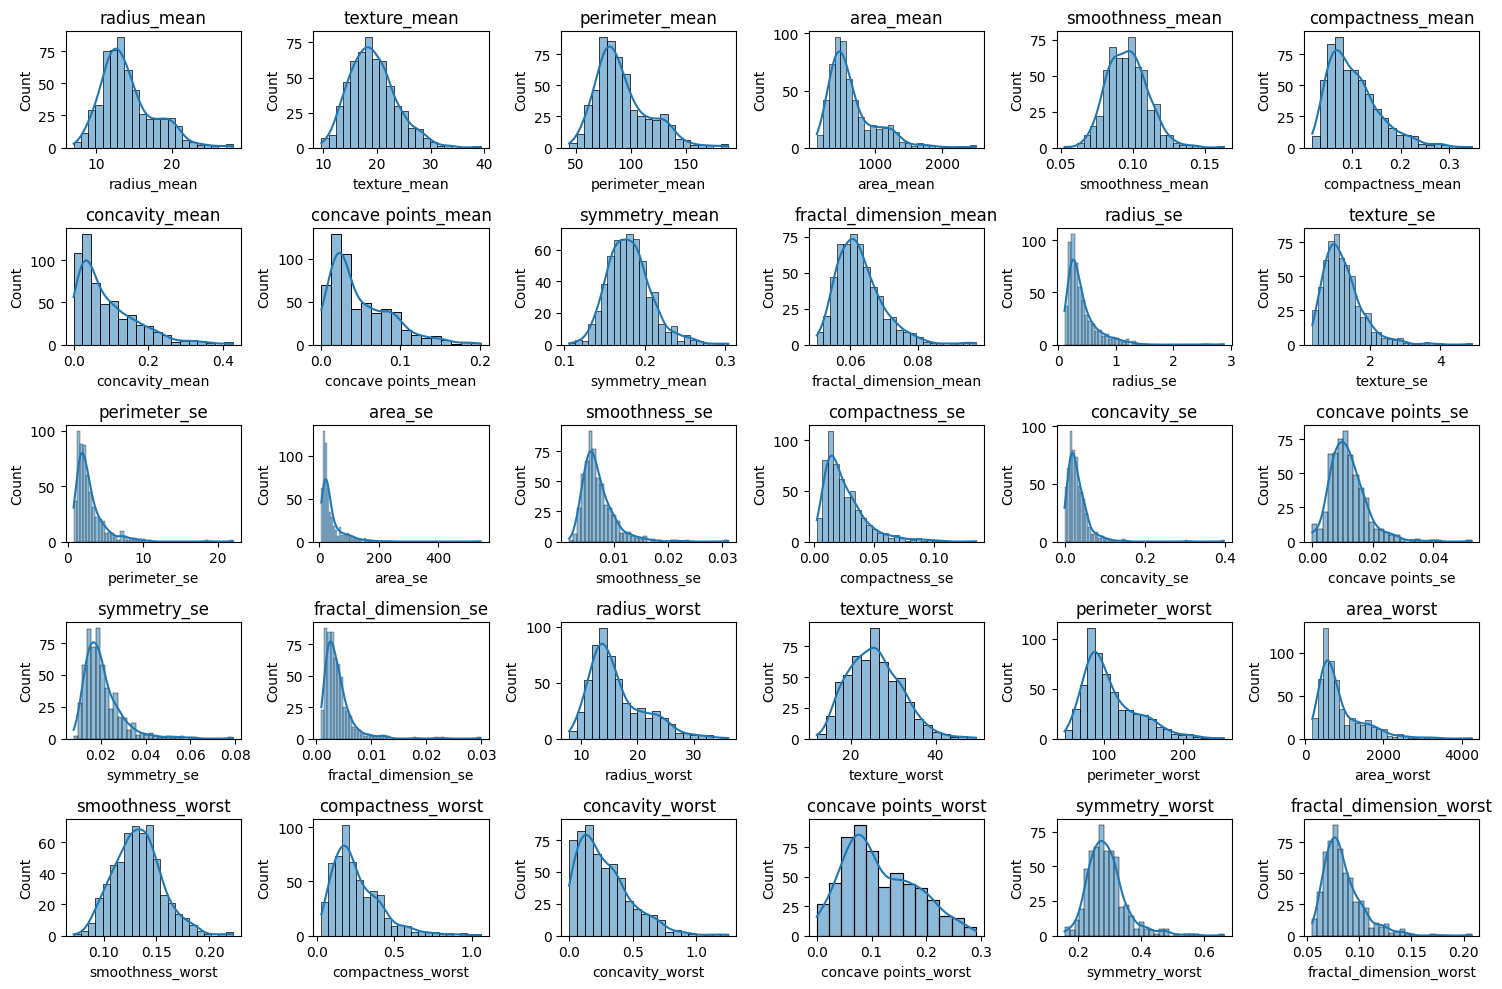


Frequency of unique values for diagnosis:
diagnosis
B    357
M    212
Name: count, dtype: int64


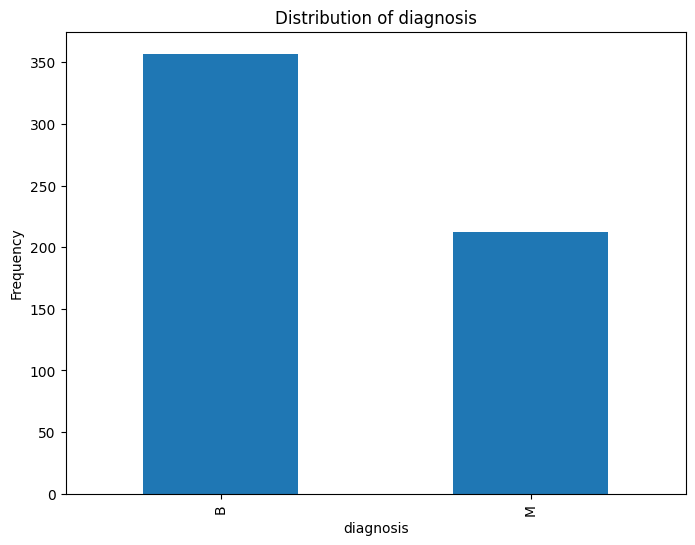

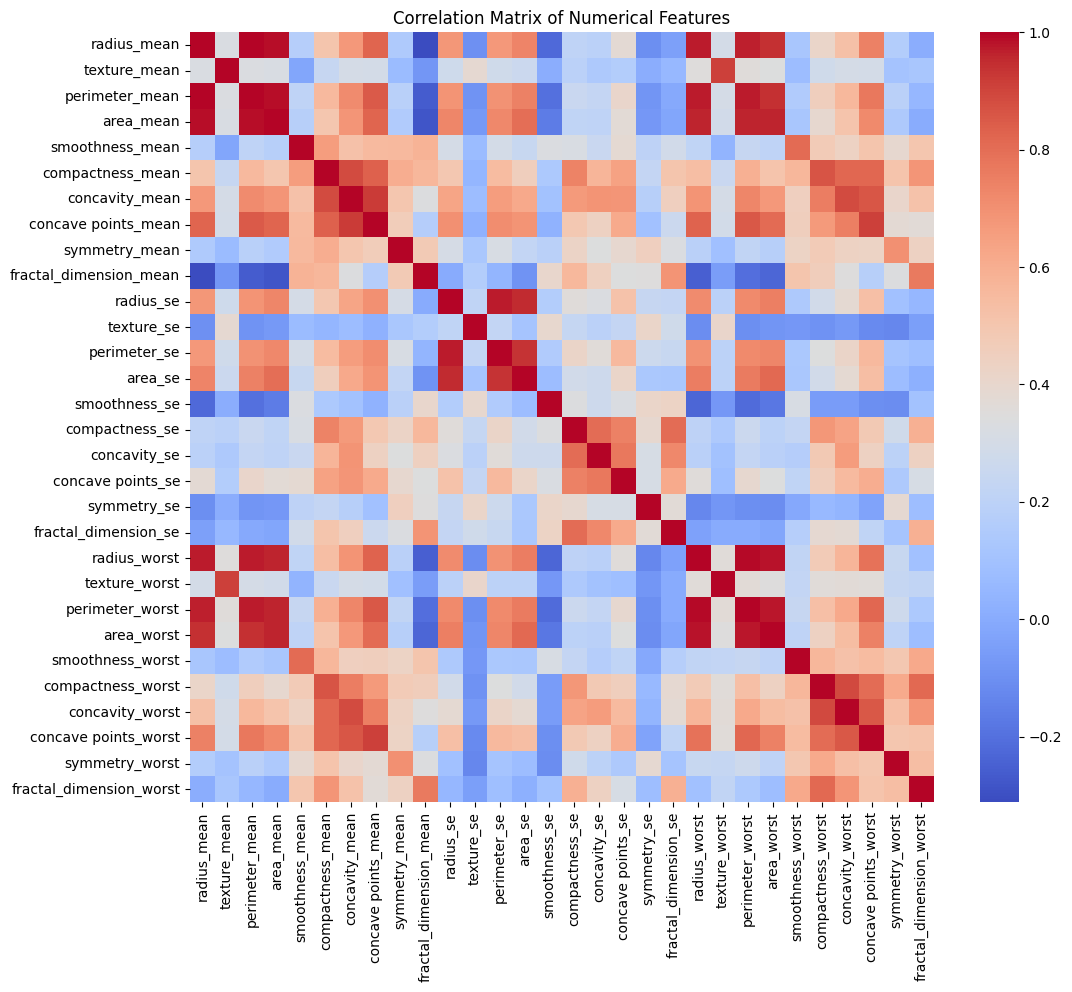

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Display data types of each column
print("\nData types of each column:\n", df.dtypes)

# 3. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing values:\n", missing_values)
print("\nPercentage of missing values:\n", missing_percentage)

# 4. Analyze the distribution of the target variable
diagnosis_counts = df['diagnosis'].value_counts()
print("\nDistribution of the target variable:\n", diagnosis_counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# 5. Descriptive statistics for numerical features
numerical_features = df.select_dtypes(include=['number'])
numerical_features = numerical_features.drop('id', axis=1, errors='ignore') # drop id column if exists
print("\nDescriptive statistics for numerical features:\n", numerical_features.describe())
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(5, 6, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# 6. Frequency of unique values for categorical features
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(f"\nFrequency of unique values for {col}:\n{df[col].value_counts()}")
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 7. Correlation between numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

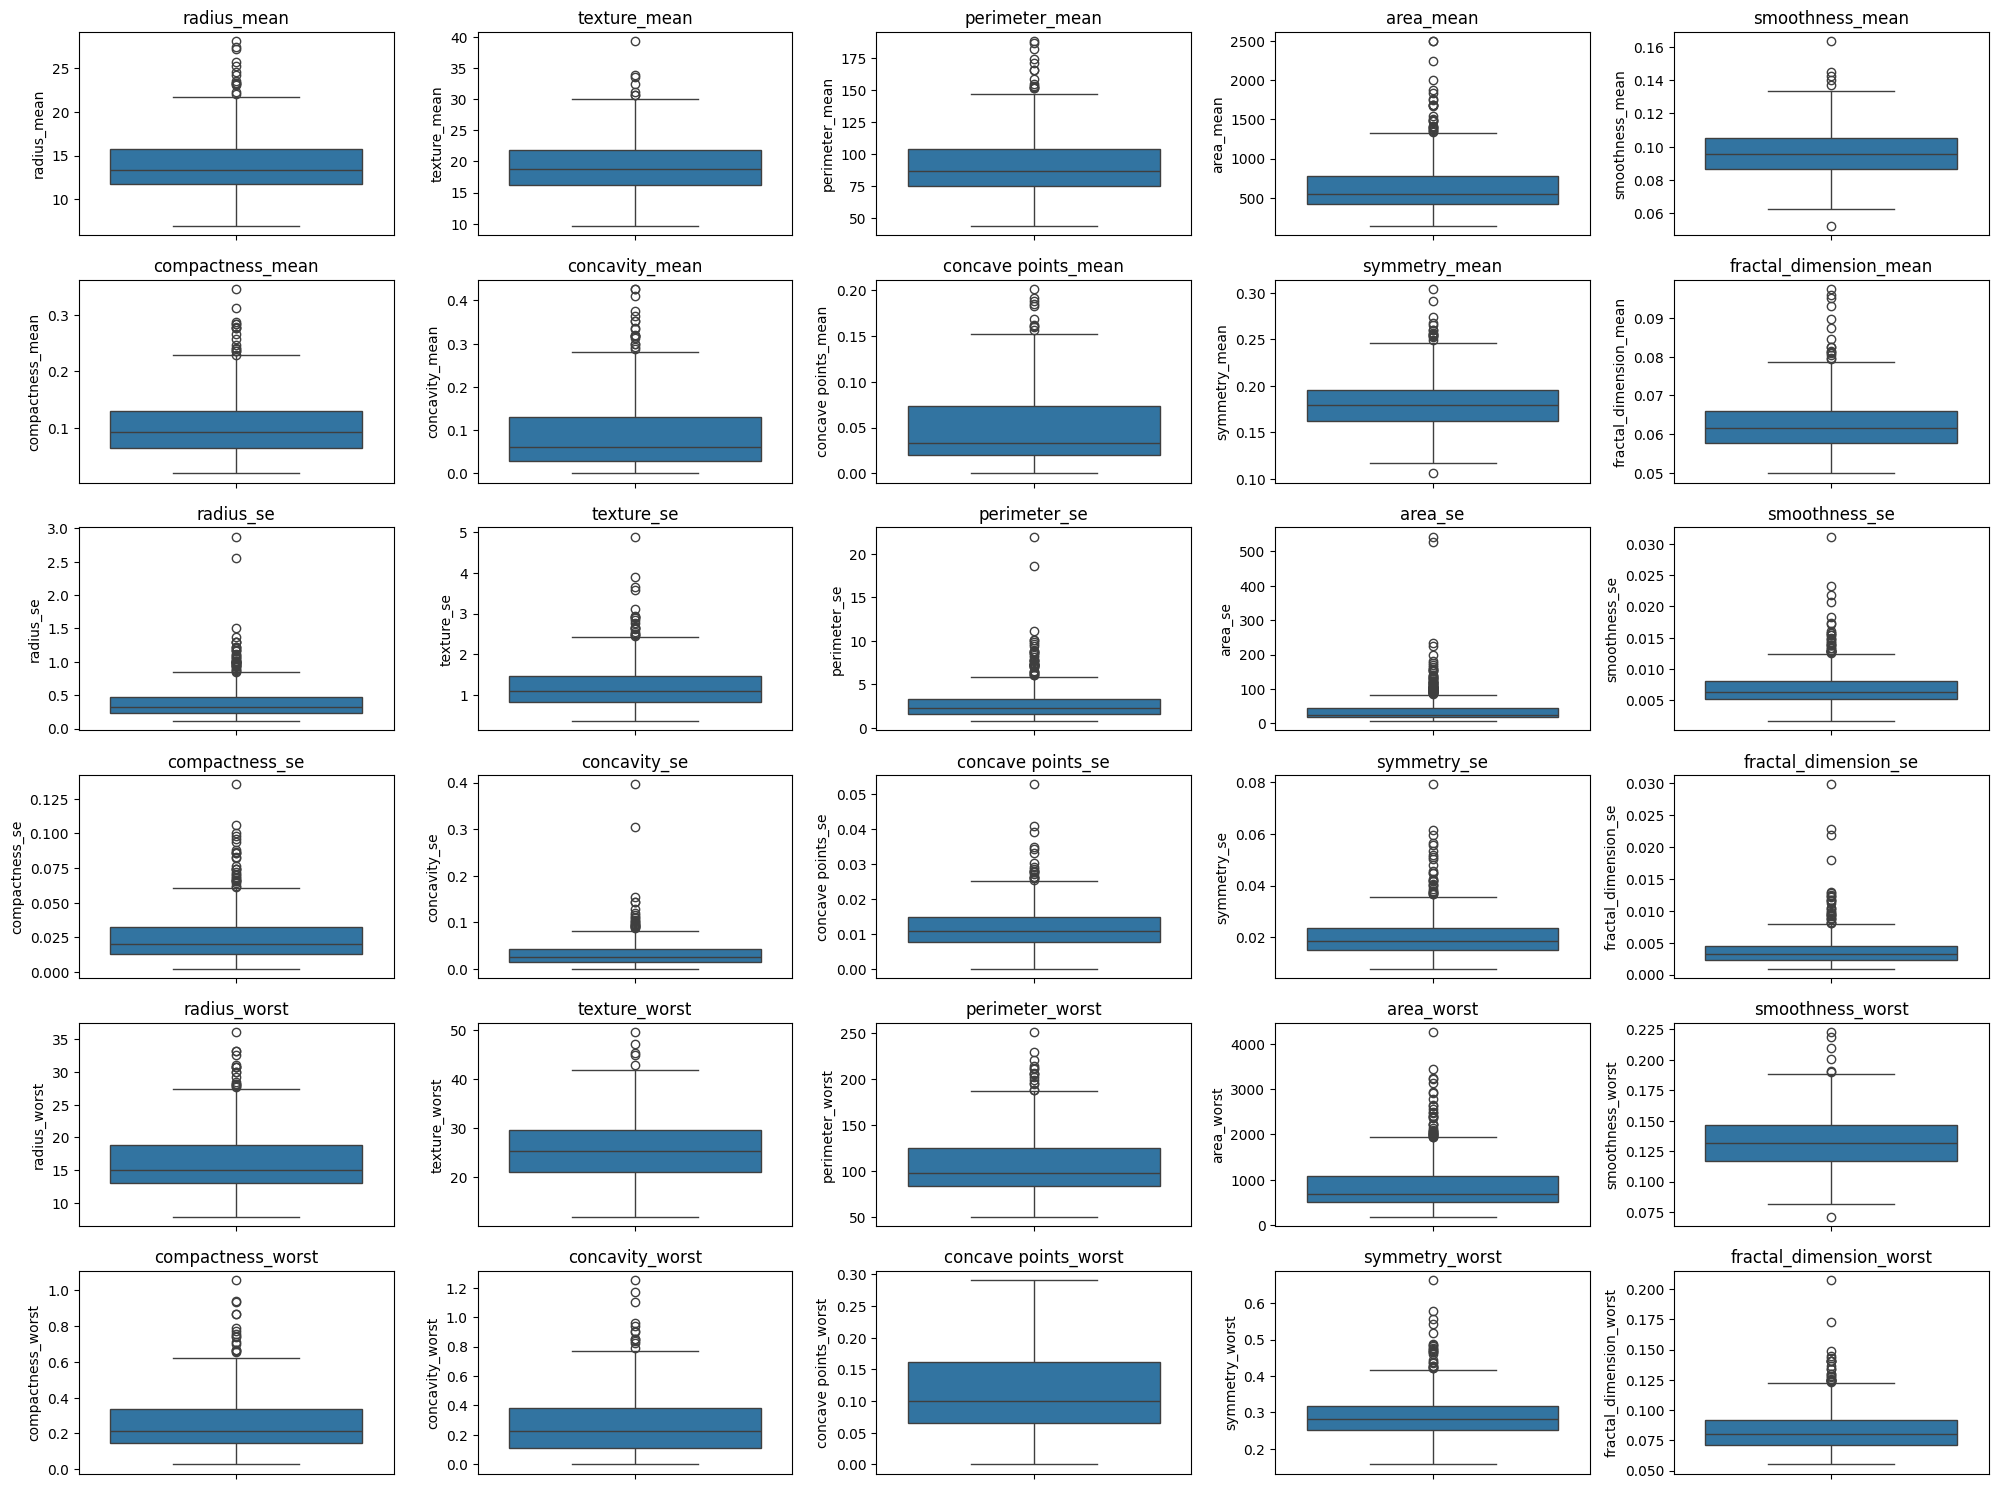

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.9304,122.80,1001.0,0.118400,0.277192,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.162200,0.665600,0.7119,0.2654,0.460100,0.118900
1,842517,M,20.57,17.7700,132.90,1326.0,0.084740,0.078640,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.123800,0.186600,0.2416,0.1860,0.275000,0.089020
2,84300903,M,19.69,21.2500,130.00,1203.0,0.109600,0.159900,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.144400,0.424500,0.4504,0.2430,0.361300,0.087580
3,84348301,M,11.42,20.3800,77.58,386.1,0.132888,0.277192,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.188908,0.778644,0.6869,0.2575,0.486908,0.140628
4,84358402,M,20.29,14.3400,135.10,1297.0,0.100300,0.132800,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.137400,0.205000,0.4000,0.1625,0.236400,0.076780


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df.select_dtypes(include=['number'])
numerical_features = numerical_features.drop('id', axis=1, errors='ignore')

# Create box plots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Winsorize the numerical features at the 1st and 99th percentiles
for col in numerical_features.columns:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Display the first few rows of the modified DataFrame
display(df.head())

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Encode the categorical feature 'diagnosis'
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# 2. Separate features (X) and target variable (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# 3. Scale the numerical features in X
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary sets (70/30 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (398, 30)
y_train shape: (398,)
X_val shape: (85, 30)
y_val shape: (85,)
X_test shape: (86, 30)
y_test shape: (86,)


In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms
X_train_interaction = np.multiply(X_train[:, 0].reshape(-1, 1), X_train[:, 1].reshape(-1, 1))
X_val_interaction = np.multiply(X_val[:, 0].reshape(-1, 1), X_val[:, 1].reshape(-1, 1))
X_test_interaction = np.multiply(X_test[:, 0].reshape(-1, 1), X_test[:, 1].reshape(-1, 1))

# Concatenate interaction terms with original features
X_train_augmented = np.concatenate((X_train, X_train_interaction), axis=1)
X_val_augmented = np.concatenate((X_val, X_val_interaction), axis=1)
X_test_augmented = np.concatenate((X_test, X_test_interaction), axis=1)

# Train a Logistic Regression model on the original features
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_val)

# Train a Logistic Regression model on the augmented features
lr_augmented = LogisticRegression(max_iter=1000)
lr_augmented.fit(X_train_augmented, y_train)
y_pred_augmented = lr_augmented.predict(X_val_augmented)

# Evaluate the models
accuracy_original = accuracy_score(y_val, y_pred_original)
precision_original = precision_score(y_val, y_pred_original)
recall_original = recall_score(y_val, y_pred_original)

accuracy_augmented = accuracy_score(y_val, y_pred_augmented)
precision_augmented = precision_score(y_val, y_pred_augmented)
recall_augmented = recall_score(y_val, y_pred_augmented)

print("Original Features:")
print("Accuracy:", accuracy_original)
print("Precision:", precision_original)
print("Recall:", recall_original)

print("\nAugmented Features (with interaction terms):")
print("Accuracy:", accuracy_augmented)
print("Precision:", precision_augmented)
print("Recall:", recall_augmented)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

lr_poly = LogisticRegression(max_iter=1000)
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_val_poly)

accuracy_poly = accuracy_score(y_val, y_pred_poly)
precision_poly = precision_score(y_val, y_pred_poly)
recall_poly = recall_score(y_val, y_pred_poly)

print("\nAugmented Features (with polynomial features):")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)

Original Features:
Accuracy: 0.9882352941176471
Precision: 1.0
Recall: 0.972972972972973

Augmented Features (with interaction terms):
Accuracy: 0.9882352941176471
Precision: 1.0
Recall: 0.972972972972973

Augmented Features (with polynomial features):
Accuracy: 0.9411764705882353
Precision: 0.9210526315789473
Recall: 0.9459459459459459


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = logreg_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.9882352941176471
Precision: 1.0
Recall: 0.972972972972973
F1-score: 0.9863013698630136
AUC-ROC: 0.9864864864864865


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize Logistic Regression model
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score (accuracy):", grid_search.best_score_)

# Use the best estimator to predict on the validation set
y_pred = grid_search.best_estimator_.predict(X_val)

# Evaluate the best estimator
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best score (accuracy): 0.9748417721518987
Accuracy: 0.9882352941176471
Precision: 1.0
Recall: 0.972972972972973
F1-score: 0.9863013698630136
AUC-ROC: 0.9864864864864865


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Use the best estimator from grid search to predict on the test set
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1-score: {f1_test}")
print(f"Test AUC-ROC: {roc_auc_test}")

Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1-score: 1.0
Test AUC-ROC: 1.0


In [1]:
import pandas as pd

try:
    df = pd.read_csv('breast-cancer.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'breast-cancer.csv' not found.")
    df = None  # or handle the error appropriately
except pd.errors.EmptyDataError:
    print("Error: 'breast-cancer.csv' is empty.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)


In [2]:
import pandas as pd

try:
    df = pd.read_csv('breast-cancer.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'breast-cancer.csv' not found.")
    df = None  # or handle the error appropriately
except pd.errors.EmptyDataError:
    print("Error: 'breast-cancer.csv' is empty.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

# Data Types and Missing Values
# Check if df was successfully loaded
if df is not None:
    print(df.info())
    print("\nTotal missing values:", df.isnull().sum().sum())

    # Summary Statistics
    print("\nSummary Statistics:")
    display(df.describe())

    # Class Imbalance
    print("\nClass Imbalance:")
    print(df['diagnosis'].value_counts())
    import matplotlib.pyplot as plt
    df['diagnosis'].value_counts().plot(kind='bar', figsize=(6, 4), color=['skyblue', 'lightcoral'])
    plt.title('Class Distribution')
    plt.xlabel('Diagnosis')
    plt.ylabel('Frequency')
    plt.show()

    # Correlation Analysis (excluding non-numeric columns)
    print("\nCorrelation Analysis (excluding non-numeric columns):")
    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr()
    import seaborn as sns
    plt.figure(figsize=(16, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("DataFrame 'df' could not be loaded. Skipping further analysis.")

Error: 'breast-cancer.csv' not found.
DataFrame 'df' could not be loaded. Skipping further analysis.



Correlation Analysis (excluding non-numeric columns):


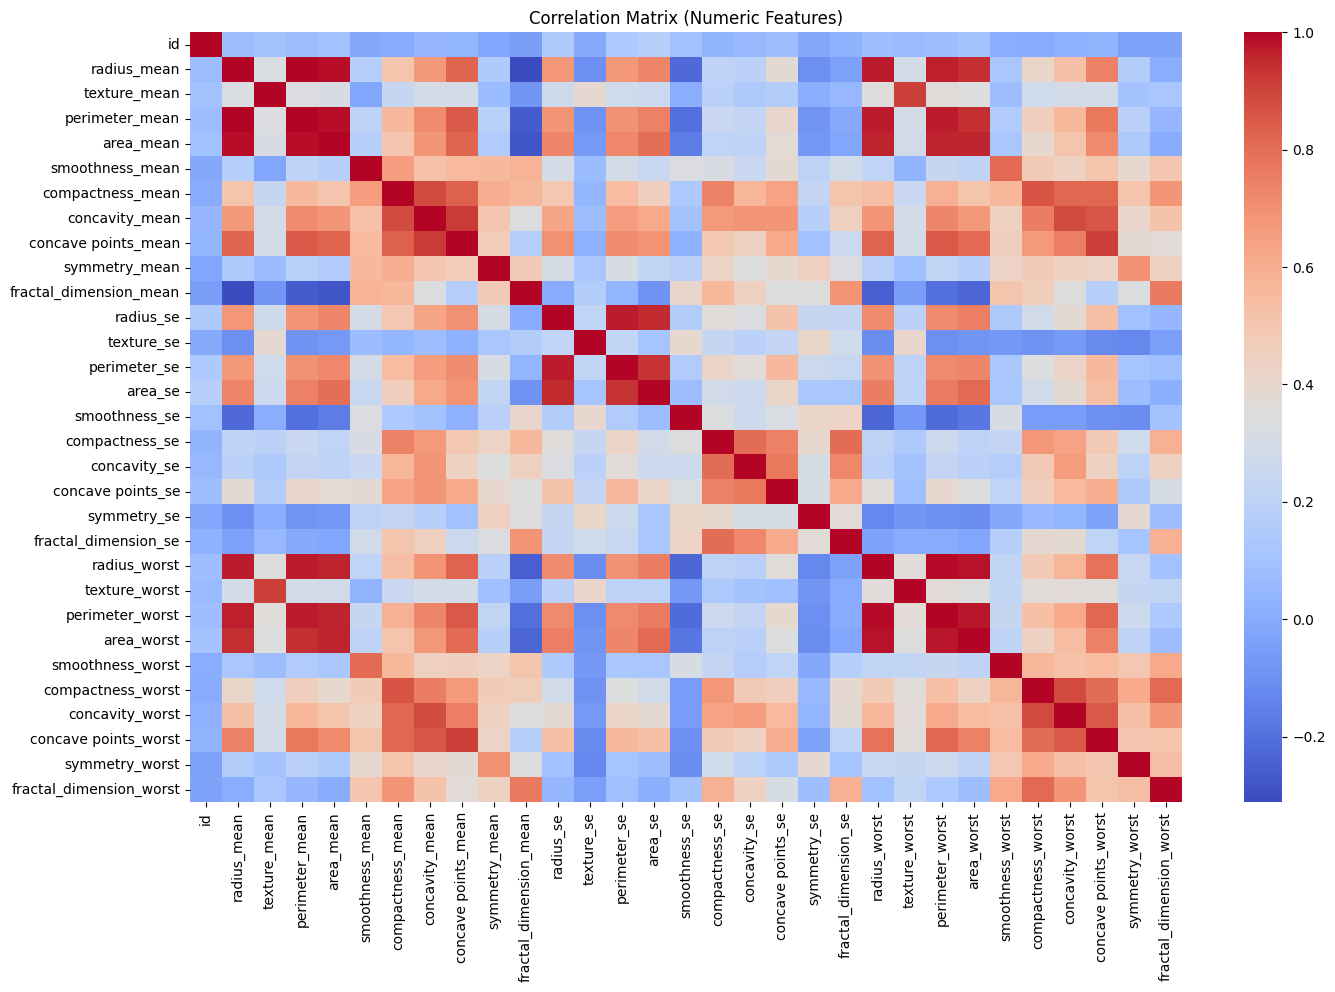

In [4]:
import seaborn as sns
# Correlation Analysis (excluding non-numeric columns)
print("\nCorrelation Analysis (excluding non-numeric columns):")
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

# Convert 'diagnosis' to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Feature scaling
features_to_scale = df.columns.drop(['id', 'diagnosis'])
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the first few rows and shape
display(df.head())
print(df.shape)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


(569, 32)


In [6]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from sklearn import svm

# Create SVM classifiers
svm_linear_model = svm.SVC(kernel='linear')
svm_rbf_model = svm.SVC(kernel='rbf')

# Train the models
svm_linear_model.fit(X_train, y_train)
svm_rbf_model.fit(X_train, y_train)

SVC()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set
y_pred_linear = svm_linear_model.predict(X_test)
y_pred_rbf = svm_rbf_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    try:  # Handle potential errors for roc_auc_score
        auc_roc = roc_auc_score(y_true, y_pred)
    except ValueError:
        auc_roc = "Error: Could not calculate AUC-ROC."

    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc}")
    print("-" * 20)

evaluate_model(y_test, y_pred_linear, "Linear SVM")
evaluate_model(y_test, y_pred_rbf, "RBF SVM")

Evaluation metrics for Linear SVM:
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9048
F1-score: 0.9500
AUC-ROC: 0.9523809523809523
--------------------
Evaluation metrics for RBF SVM:
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-score: 0.9630
AUC-ROC: 0.9642857142857143
--------------------


In [1]:
import pandas as pd

try:
    df = pd.read_csv('breast-cancer.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'breast-cancer.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

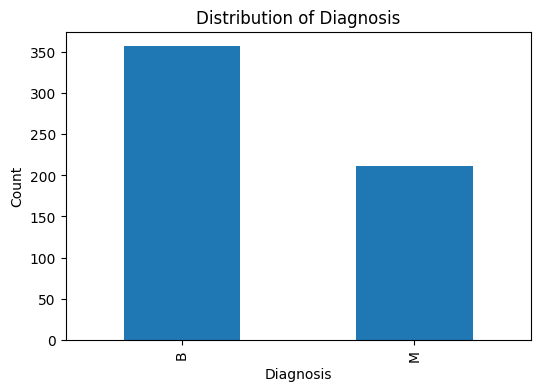

Selected features: ['radius_mean', 'texture_mean']


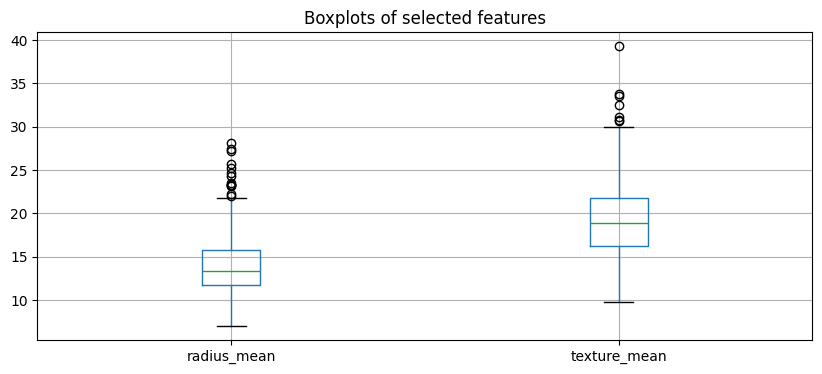

In [2]:
# Check data types and missing values
print(df.dtypes)
print(df.isnull().sum())

# Analyze target variable distribution
print(df['diagnosis'].value_counts(normalize=True) * 100)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Feature selection for 2D visualization
# Select 'radius_mean' and 'texture_mean' for demonstration
selected_features = ['radius_mean', 'texture_mean']
print("Selected features:", selected_features)

# Outlier Detection (Optional - visual inspection of box plots)
plt.figure(figsize=(10, 4))
df.boxplot(column=selected_features)
plt.title("Boxplots of selected features")
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# No missing values were found in the exploration phase
# but we still need to check for them here

# Scale features
scaler = StandardScaler()
features_to_scale = ['radius_mean', 'texture_mean']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Encode target variable
diagnosis_mapping = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)

# Split data
X = df[['radius_mean', 'texture_mean']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


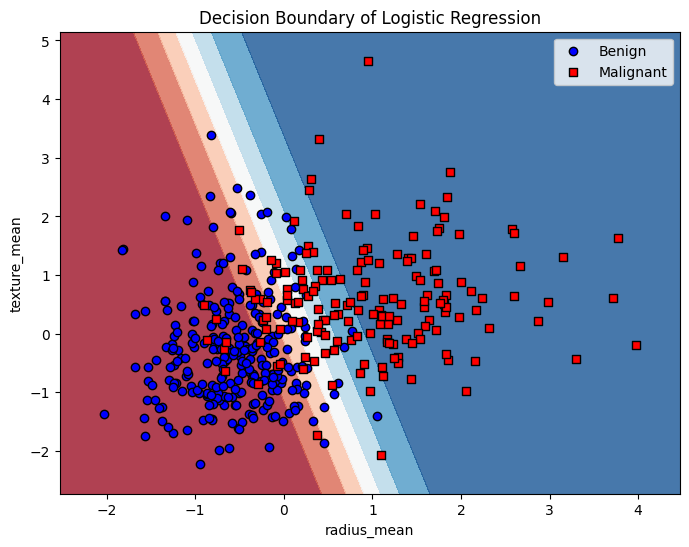

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create meshgrid
x_min, x_max = X_train['radius_mean'].min() - 0.5, X_train['radius_mean'].max() + 0.5
y_min, y_max = X_train['texture_mean'].min() - 0.5, X_train['texture_mean'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class probabilities
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Create contour plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Overlay training data points
plt.scatter(X_train[y_train == 0]['radius_mean'], X_train[y_train == 0]['texture_mean'], c='blue', marker='o', label='Benign', edgecolors='k')
plt.scatter(X_train[y_train == 1]['radius_mean'], X_train[y_train == 1]['texture_mean'], c='red', marker='s', label='Malignant', edgecolors='k')

# Add labels, title, and legend
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Decision Boundary of Logistic Regression')
plt.legend()

# Display plot
plt.show()

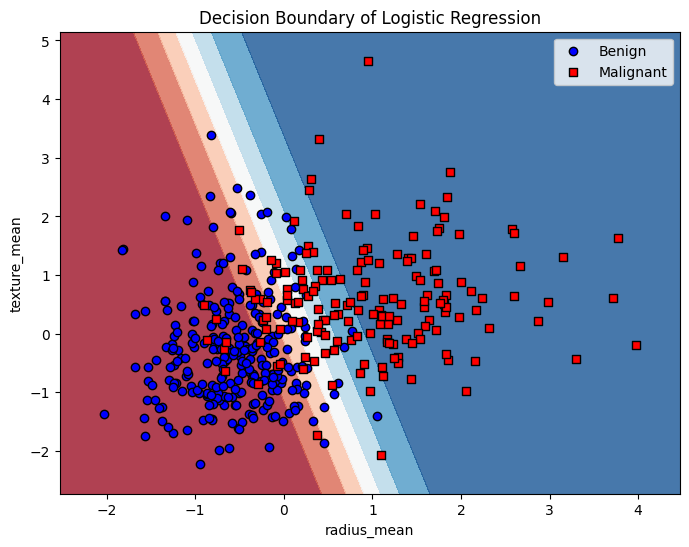

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create meshgrid
x_min, x_max = X_train['radius_mean'].min() - 0.5, X_train['radius_mean'].max() + 0.5
y_min, y_max = X_train['texture_mean'].min() - 0.5, X_train['texture_mean'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class probabilities, with feature names
input_data = pd.DataFrame({'radius_mean': xx.ravel(), 'texture_mean': yy.ravel()})
Z = model.predict_proba(input_data)[:, 1]
Z = Z.reshape(xx.shape)

# Create contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Overlay training data points
plt.scatter(X_train[y_train == 0]['radius_mean'], X_train[y_train == 0]['texture_mean'], c='blue', marker='o', label='Benign', edgecolors='k')
plt.scatter(X_train[y_train == 1]['radius_mean'], X_train[y_train == 1]['texture_mean'], c='red', marker='s', label='Malignant', edgecolors='k')

# Add labels, title, and legend
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Decision Boundary of Logistic Regression')
plt.legend()

# Display plot
plt.show()

In [1]:
import pandas as pd

try:
    df = pd.read_csv('breast-cancer.csv')
    print("Shape:", df.shape)
    print("\nColumns:", df.columns)
    print("\nData Types:\n", df.dtypes)
    display(df.head())
except FileNotFoundError:
    print("Error: 'breast-cancer.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Shape: (569, 32)

Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Data Types:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             fl

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Check for missing values
print(df.isnull().sum())

# Convert 'diagnosis' to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Verify data types
print("\nData Types after transformation:\n", df.dtypes)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Data Types after transformation:
 id                      

In [3]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['diagnosis']
)

In [4]:
from sklearn.svm import SVC

# Create an SVM classifier with default hyperparameters
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

SVC()

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
}

# Create an SVM classifier
svm_model = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    svm_model, param_grid, scoring='accuracy', cv=5, verbose=1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")
print(f"Best estimator: {best_estimator}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 0.1, 'gamma': 0.001}
Best estimator: SVC(C=0.1, gamma=0.001)


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Retrain the default model
svm_model.fit(X_train, y_train)

# Predict the labels for the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics, handling potential warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0) # Handle zero division
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


# Predict with the default model
y_pred_default = svm_model.predict(X_test)

# Calculate evaluation metrics for the default model
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    accuracy_default = accuracy_score(y_test, y_pred_default)
    precision_default = precision_score(y_test, y_pred_default, zero_division=0)
    recall_default = recall_score(y_test, y_pred_default)
    f1_default = f1_score(y_test, y_pred_default)
    auc_default = roc_auc_score(y_test, y_pred_default)

print("\nComparison with default hyperparameters:")
print(f"Accuracy (default): {accuracy_default:.4f}")
print(f"Precision (default): {precision_default:.4f}")
print(f"Recall (default): {recall_default:.4f}")
print(f"F1-score (default): {f1_default:.4f}")
print(f"AUC (default): {auc_default:.4f}")

Accuracy: 0.6316
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
AUC: 0.5000

Comparison with default hyperparameters:
Accuracy (default): 0.6316
Precision (default): 0.0000
Recall (default): 0.0000
F1-score (default): 0.0000
AUC (default): 0.5000


In [1]:
import pandas as pd

try:
    df = pd.read_csv('breast-cancer.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'breast-cancer.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

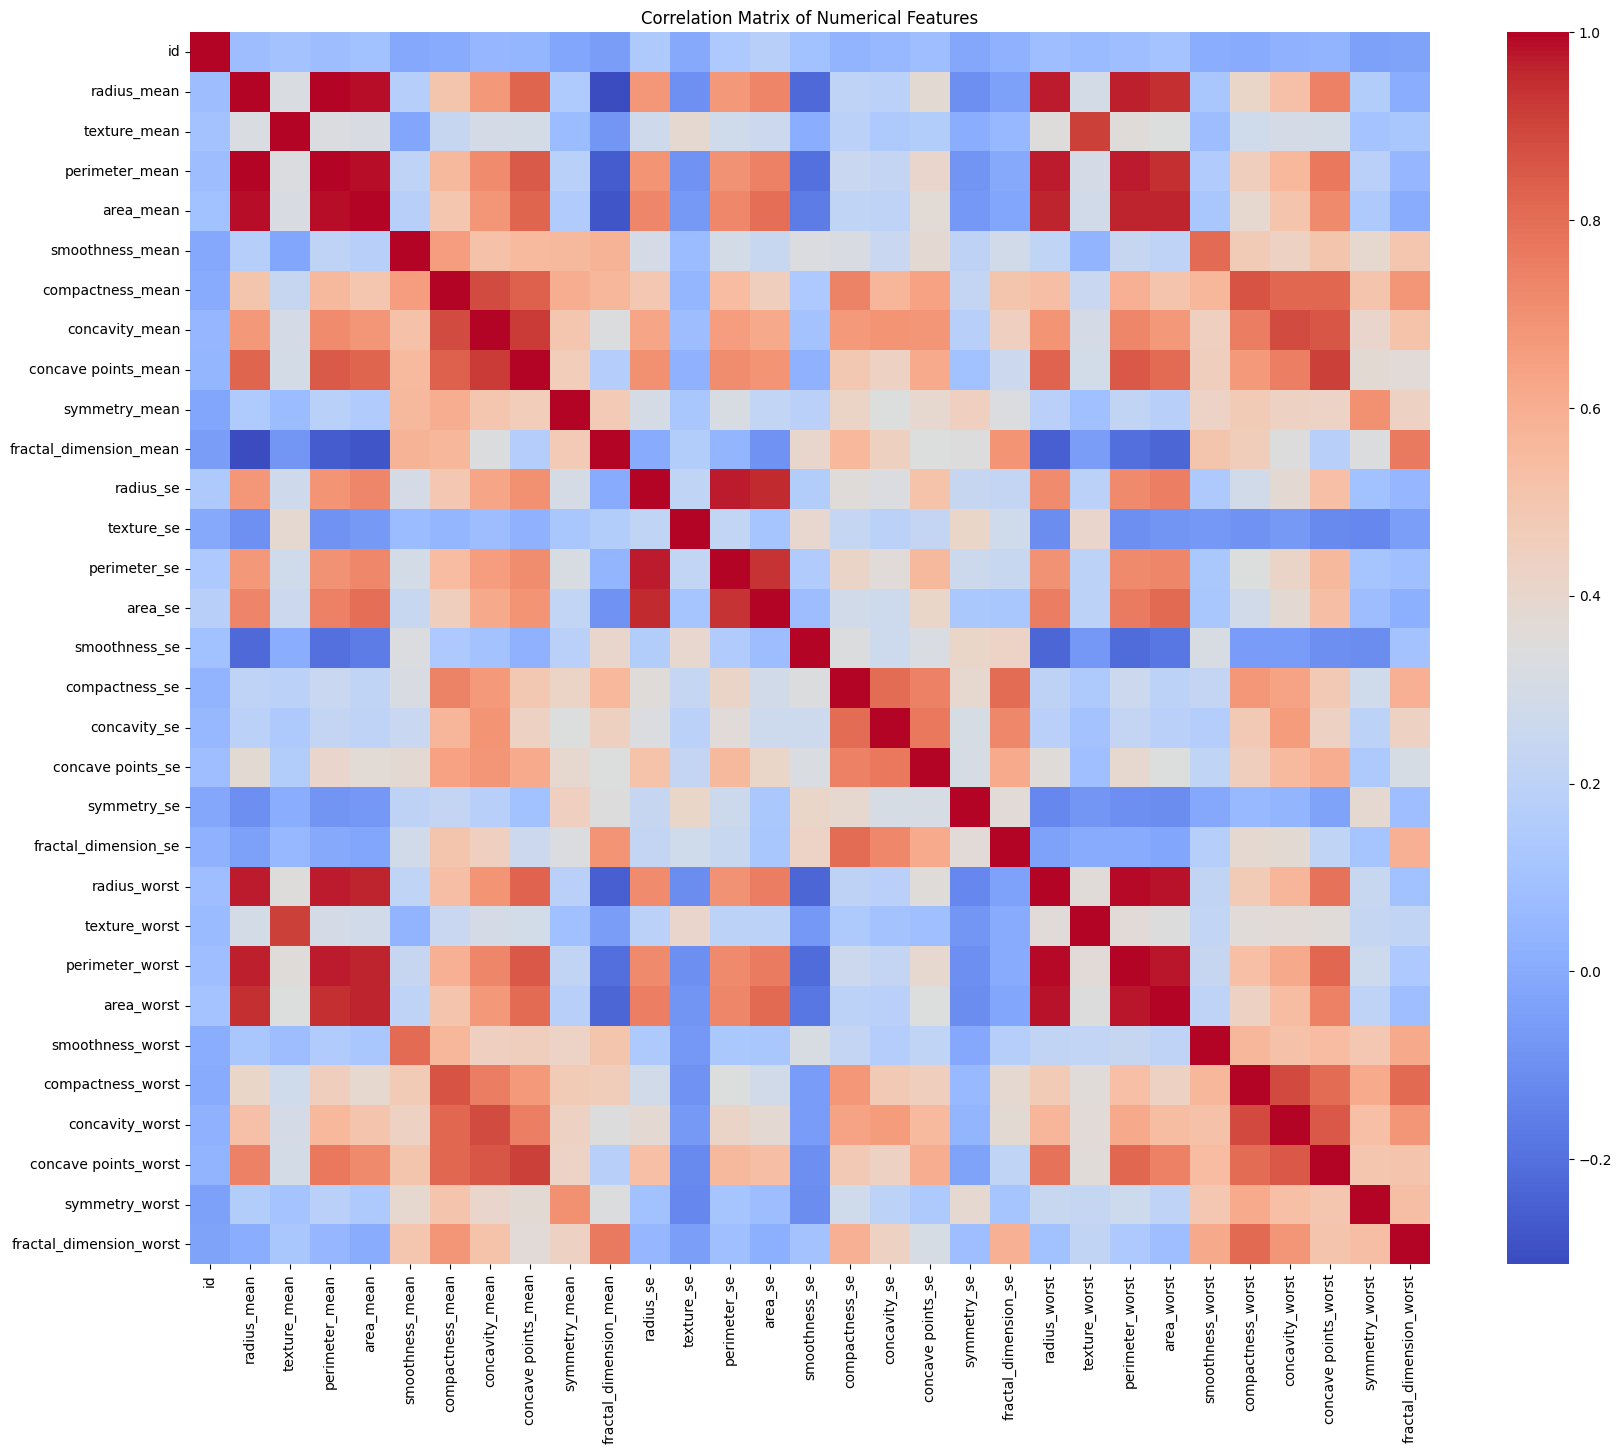

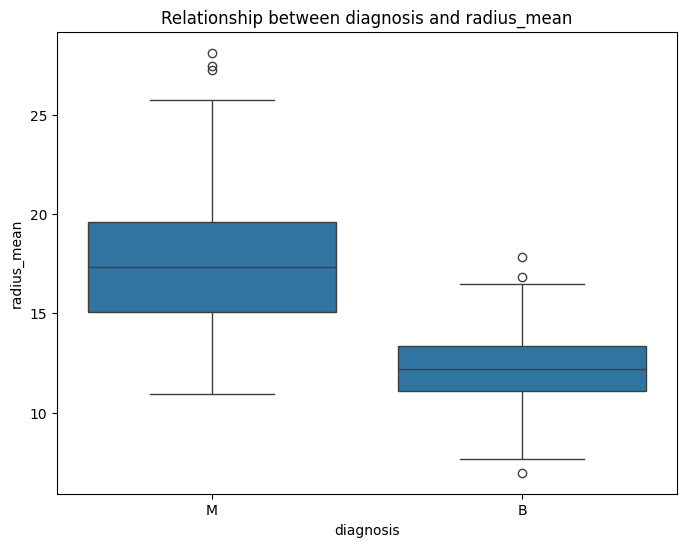

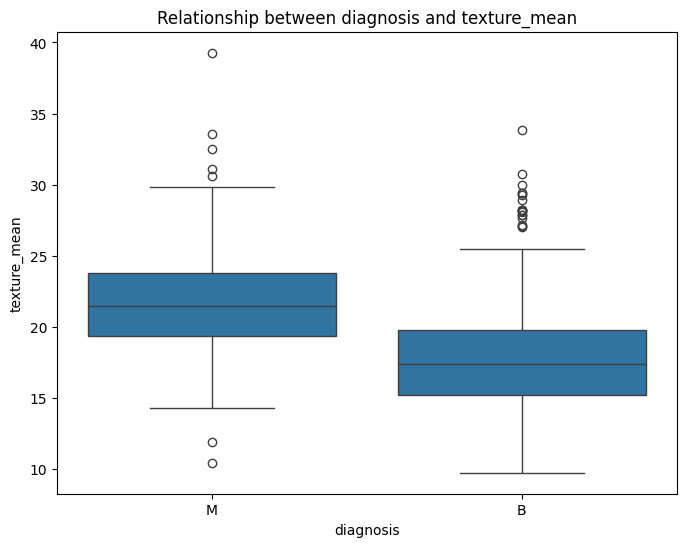

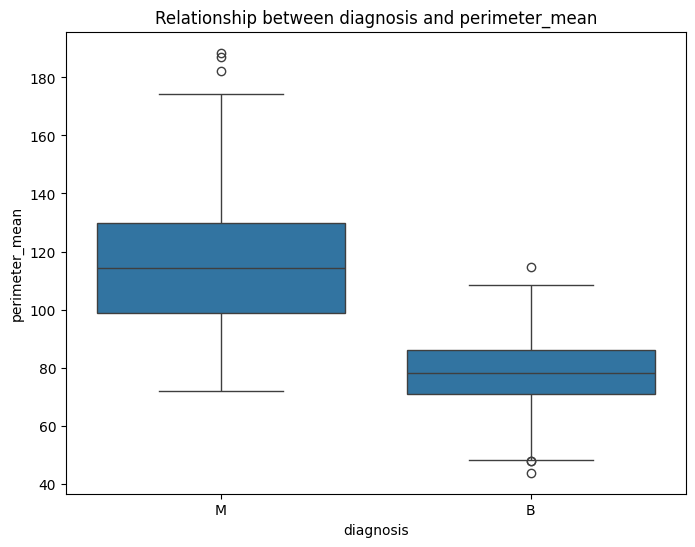

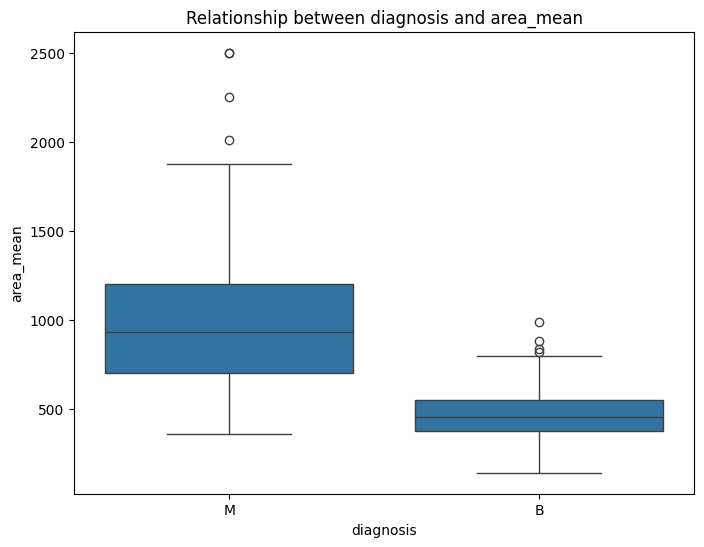

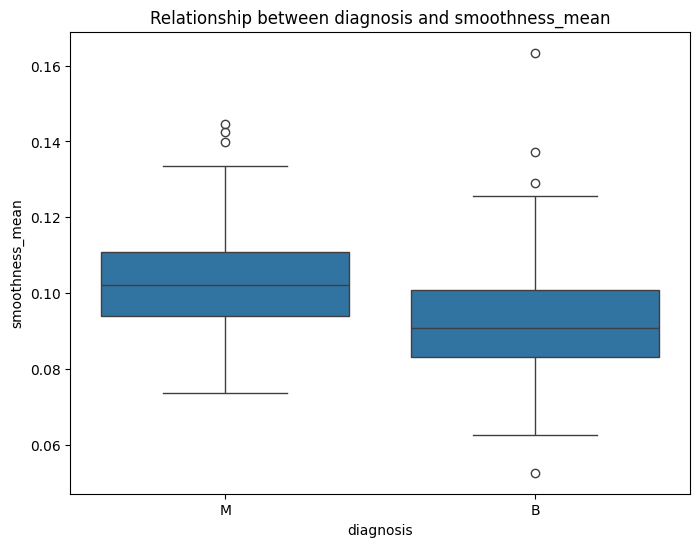

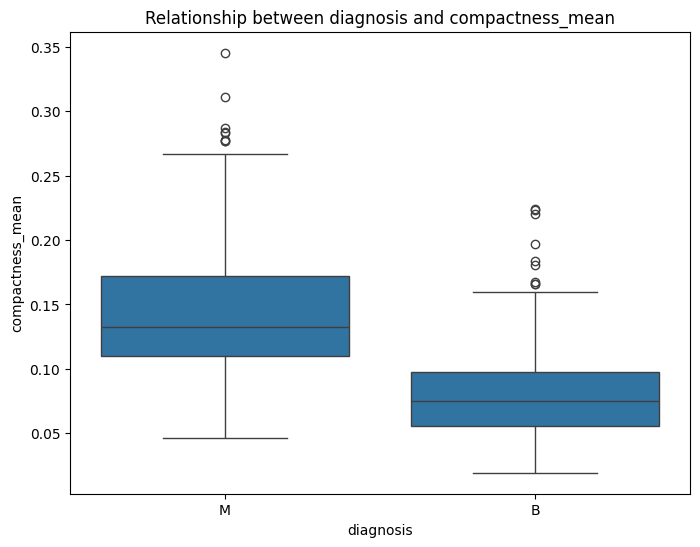

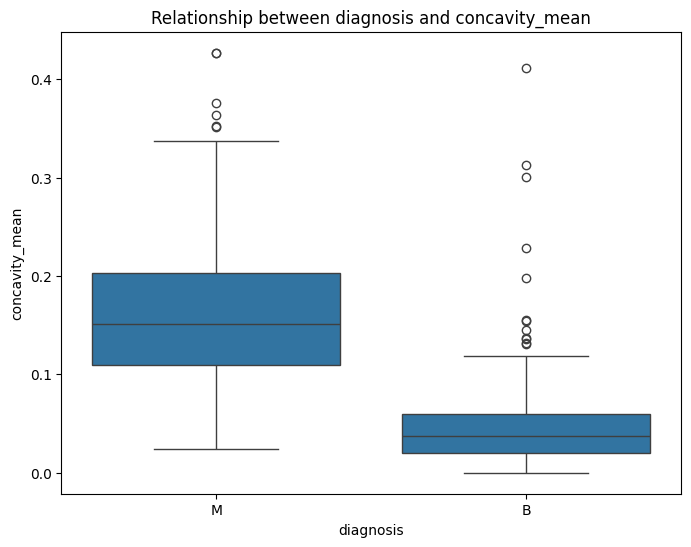

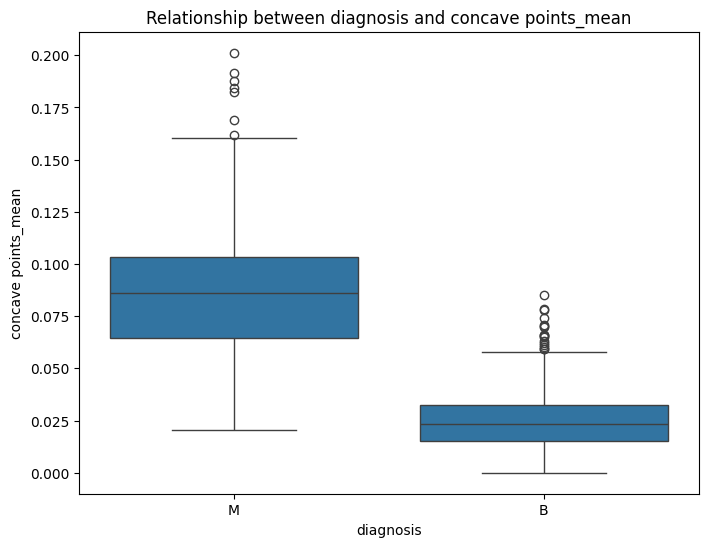

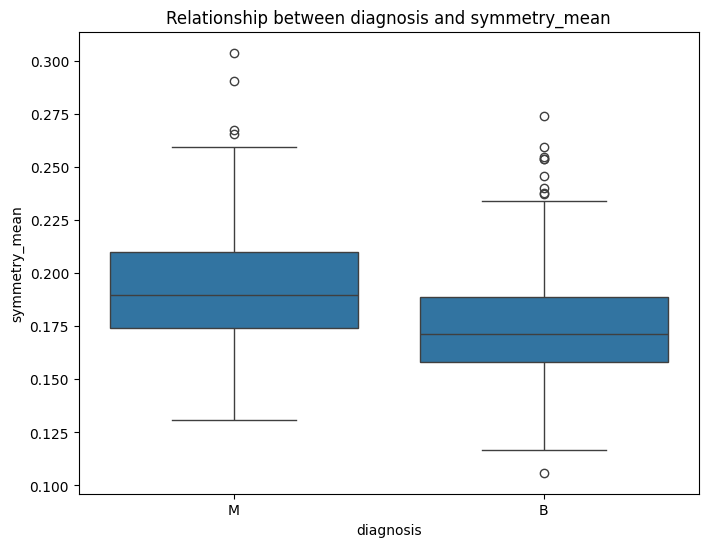

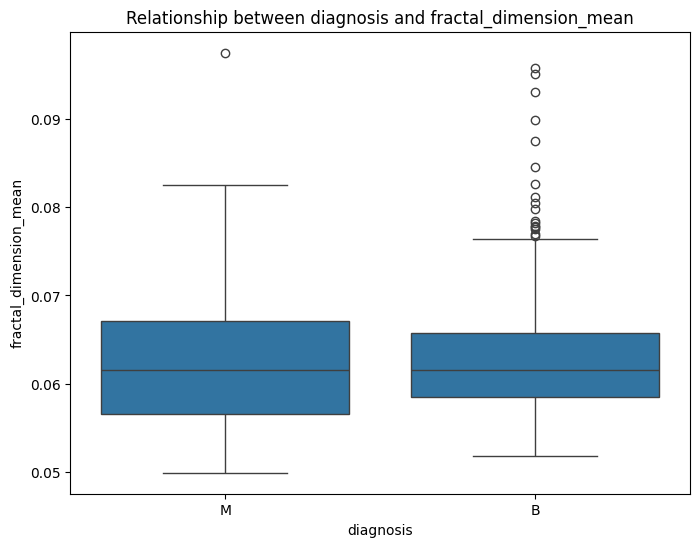

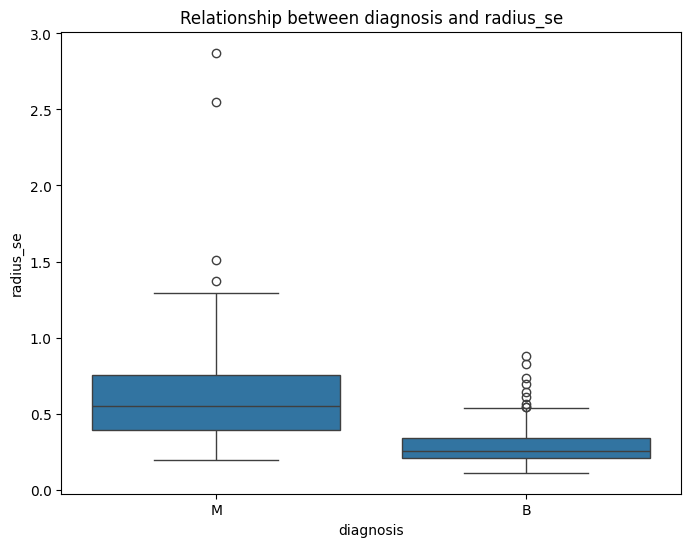

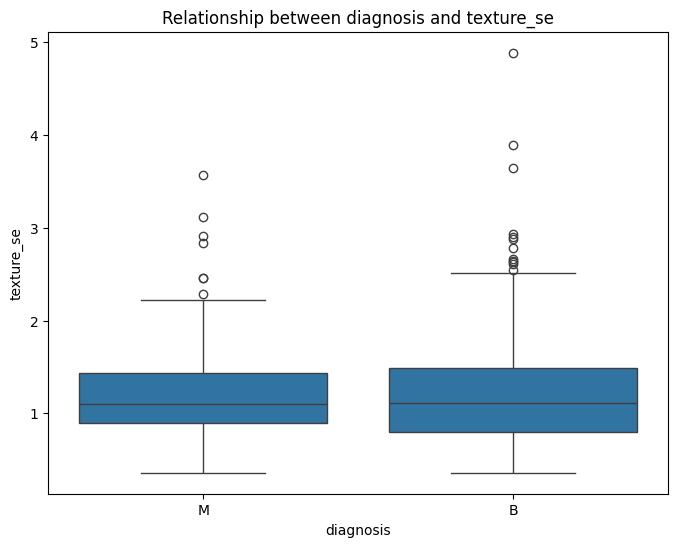

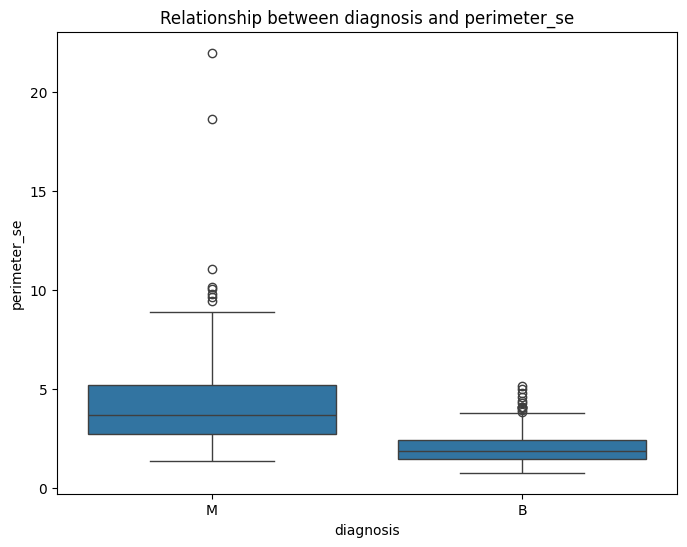

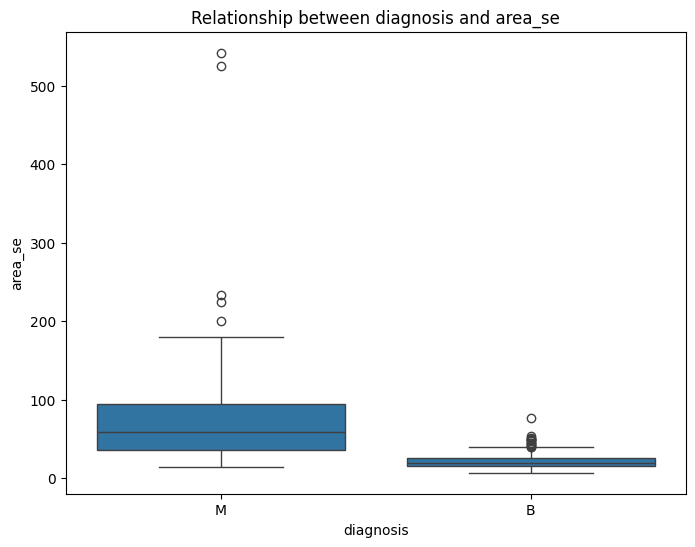

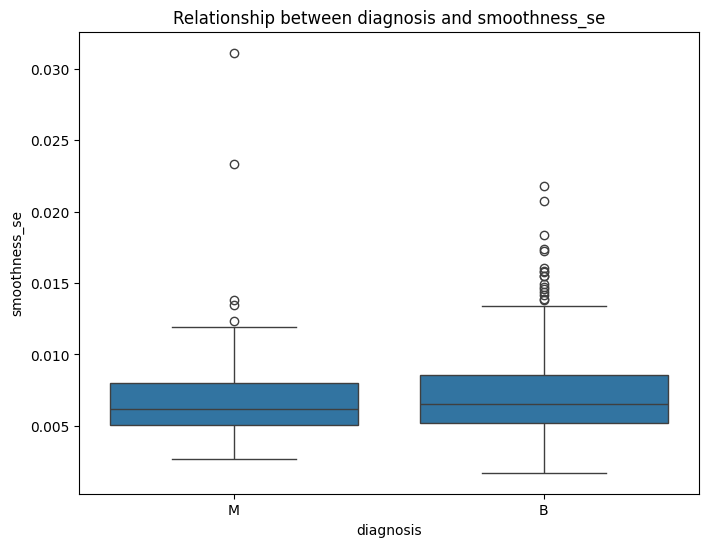

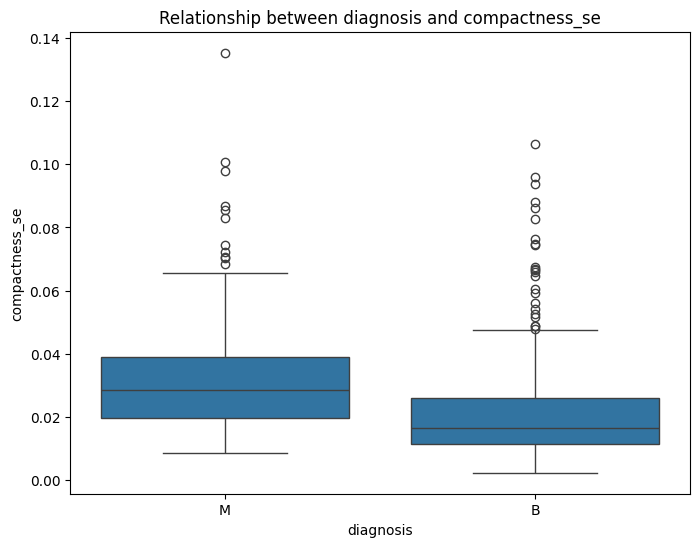

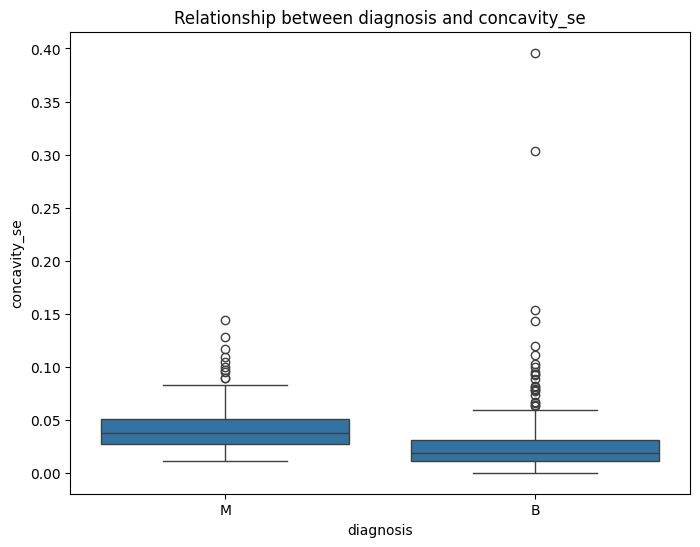

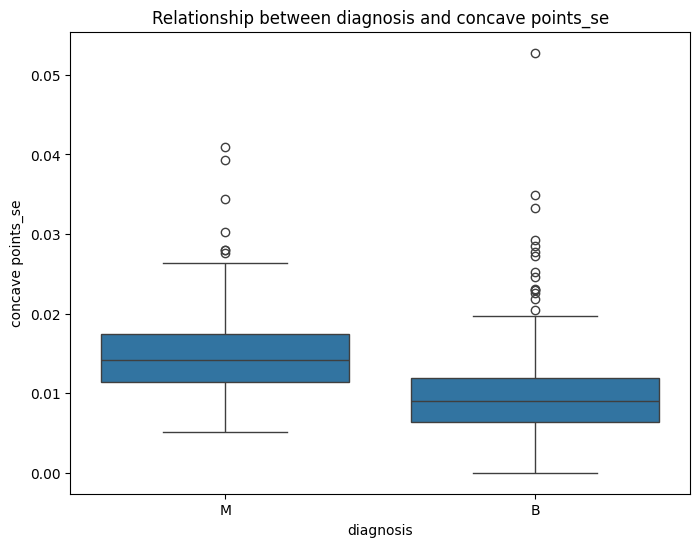

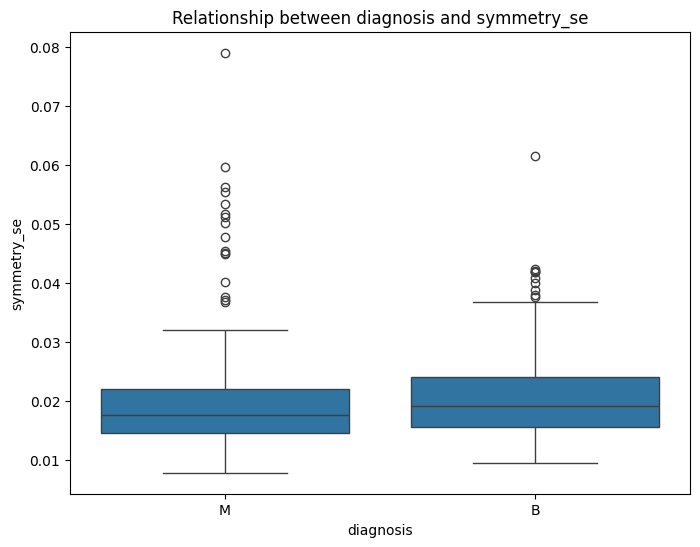

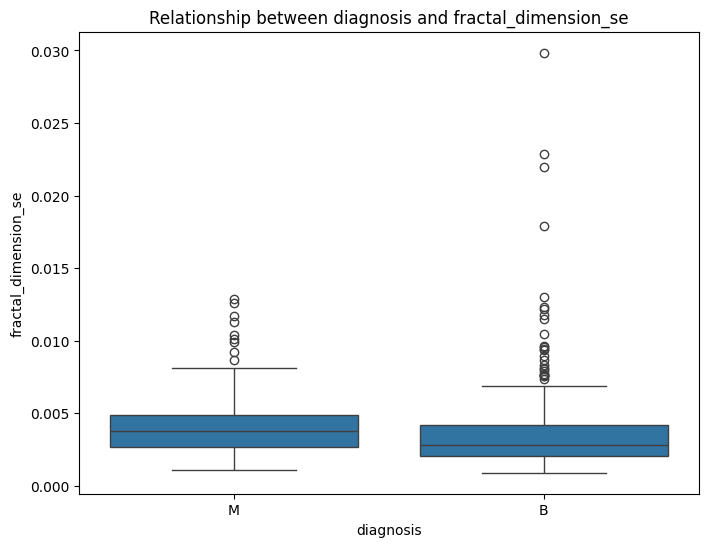

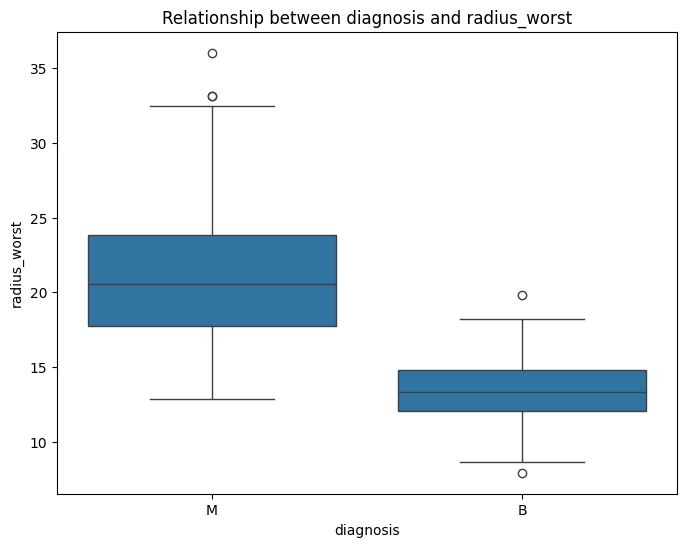

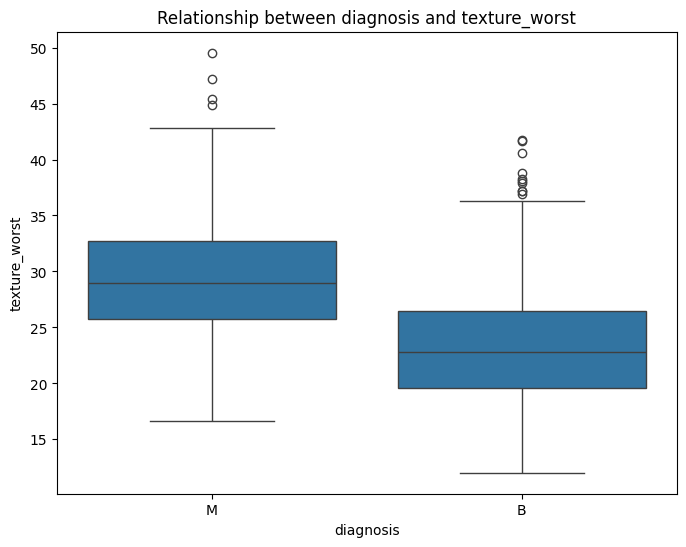

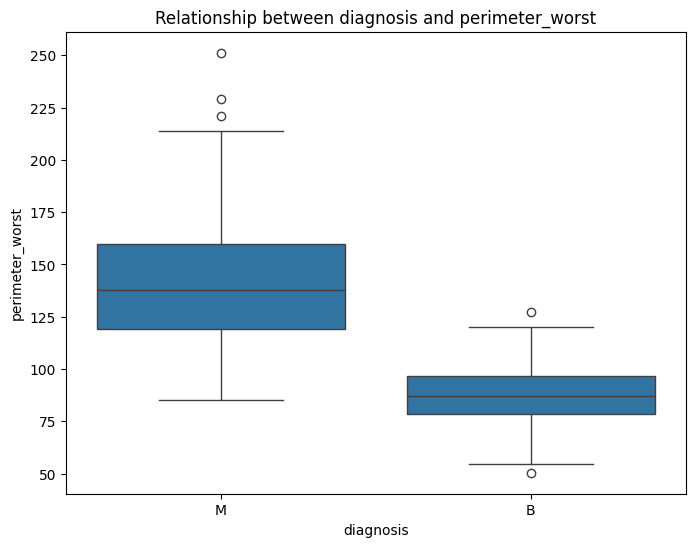

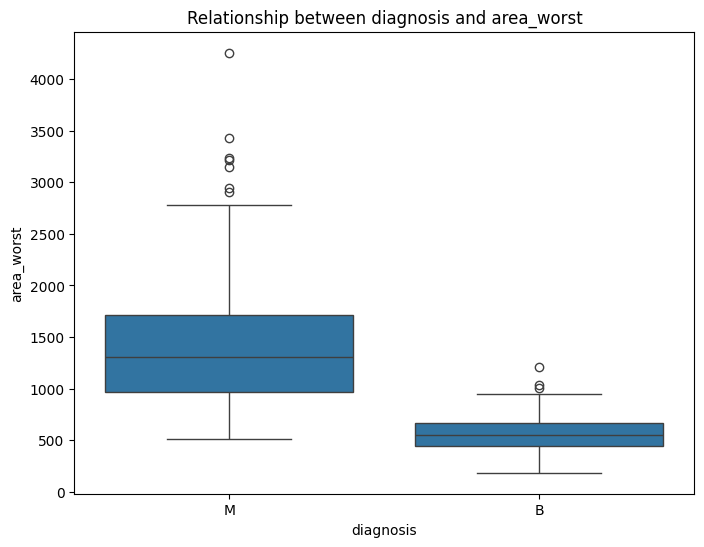

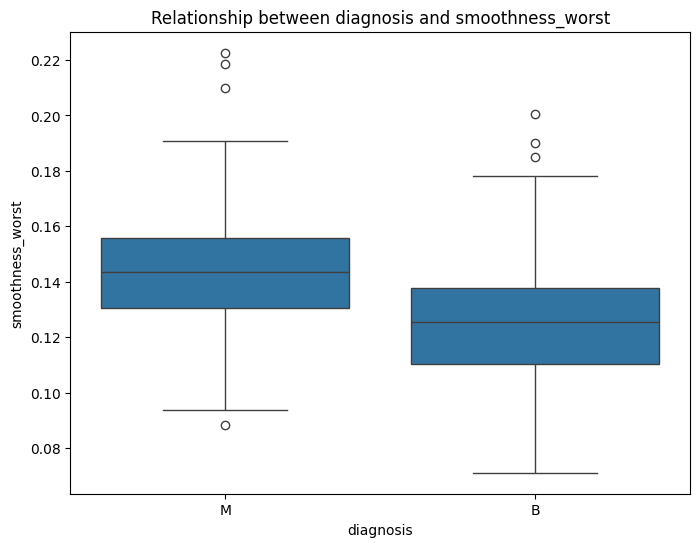

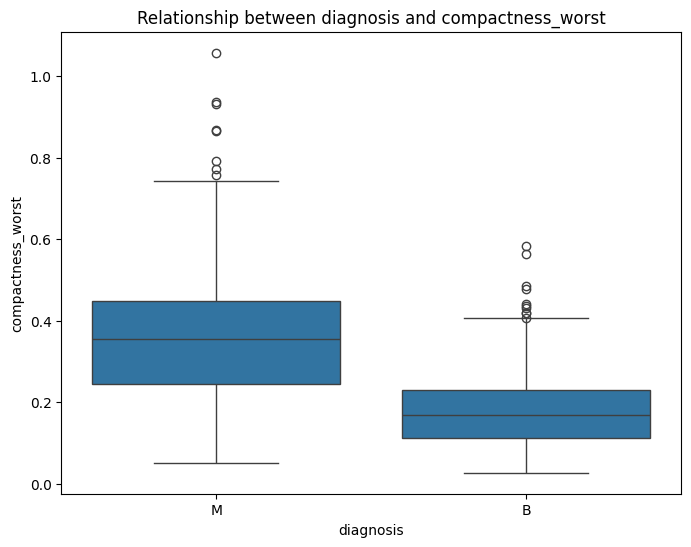

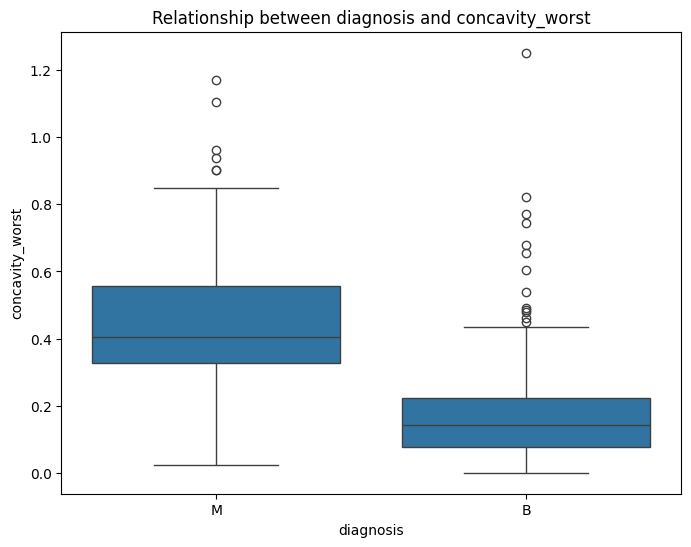

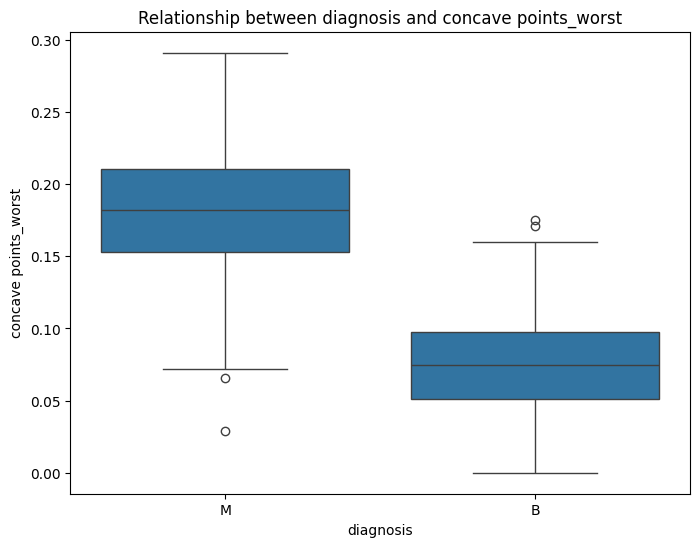

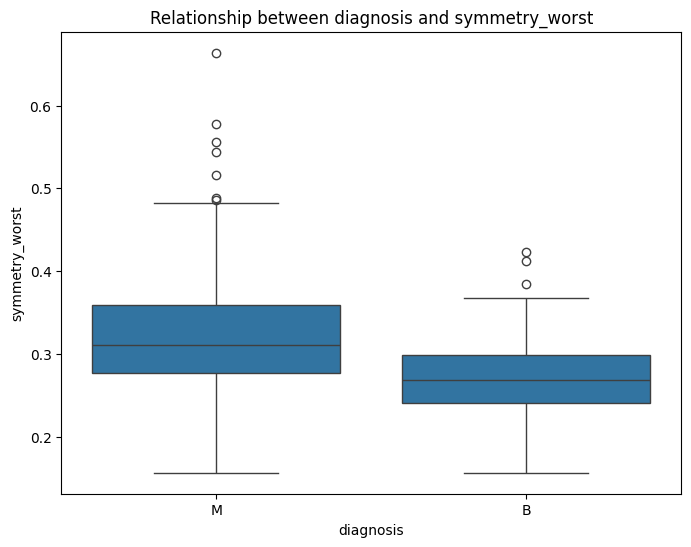

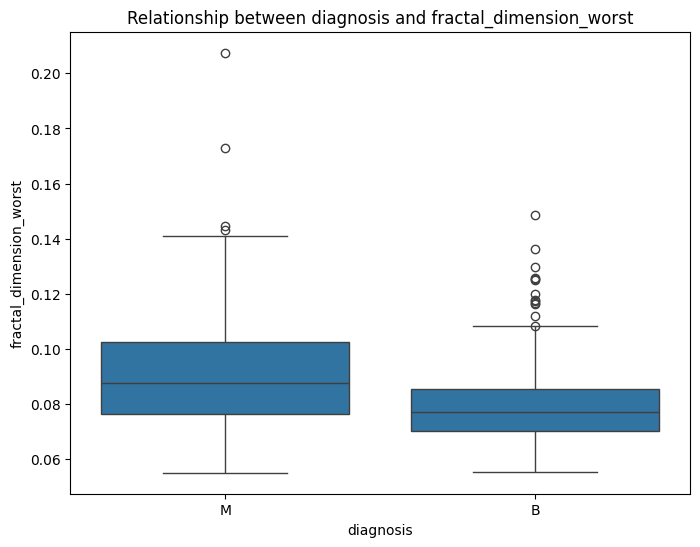

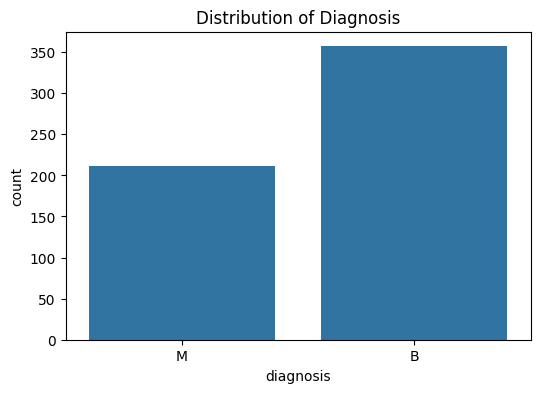

In [2]:
# Examine data types
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Analyze the distribution of each feature
numerical_features = df.select_dtypes(include=['number'])
categorical_features = df.select_dtypes(exclude=['number'])

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", numerical_features.describe())

# Correlation matrix for numerical features
correlation_matrix = numerical_features.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Relationship between target variable and other features
target_variable = 'diagnosis'
for col in numerical_features.columns:
    if col != target_variable and col != 'id':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target_variable, y=col, data=df)
        plt.title(f"Relationship between {target_variable} and {col}")
        plt.show()

# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_variable, data=df)
plt.title('Distribution of Diagnosis')
plt.show()

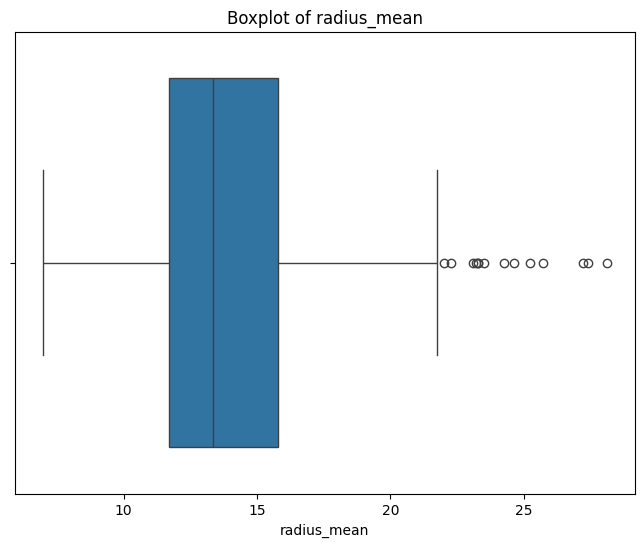

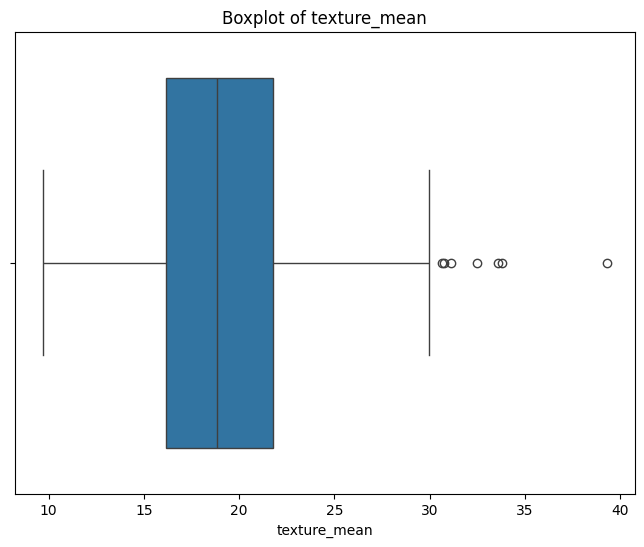

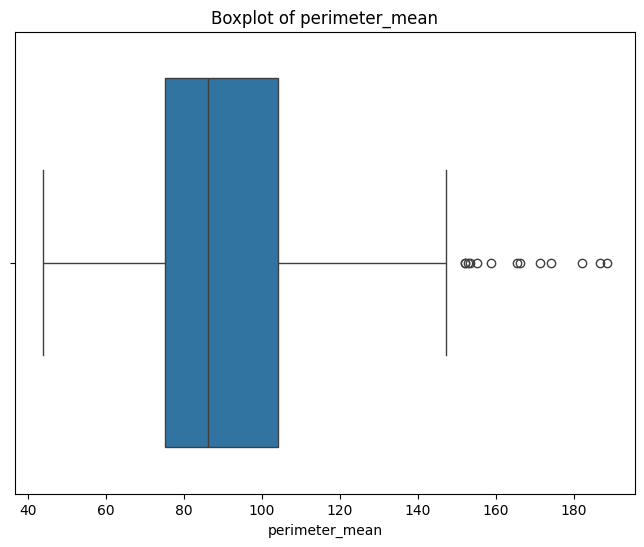

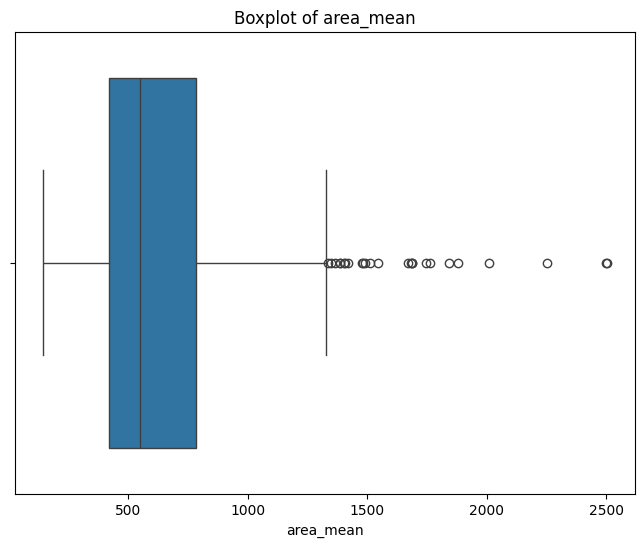

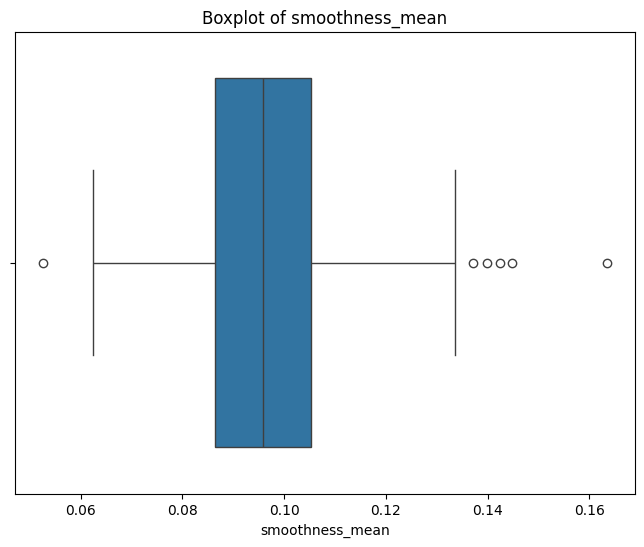

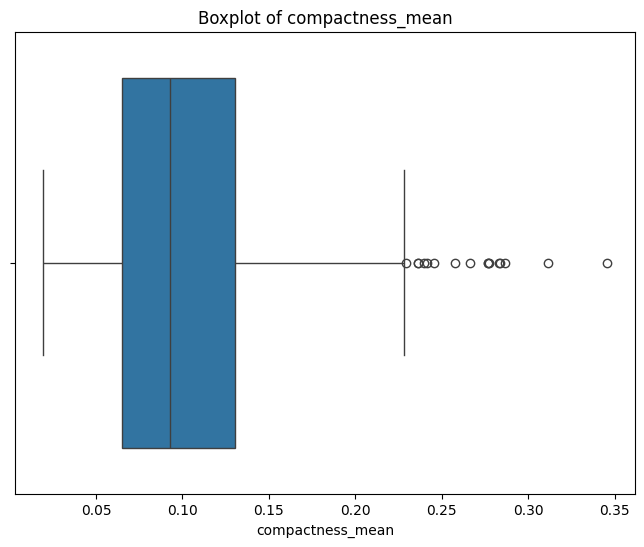

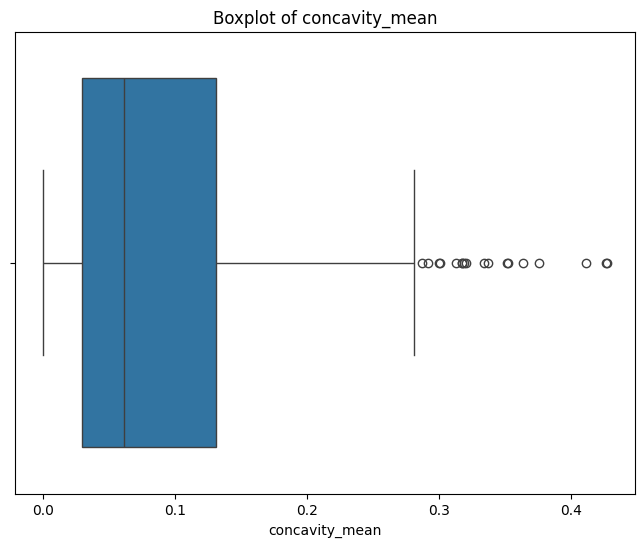

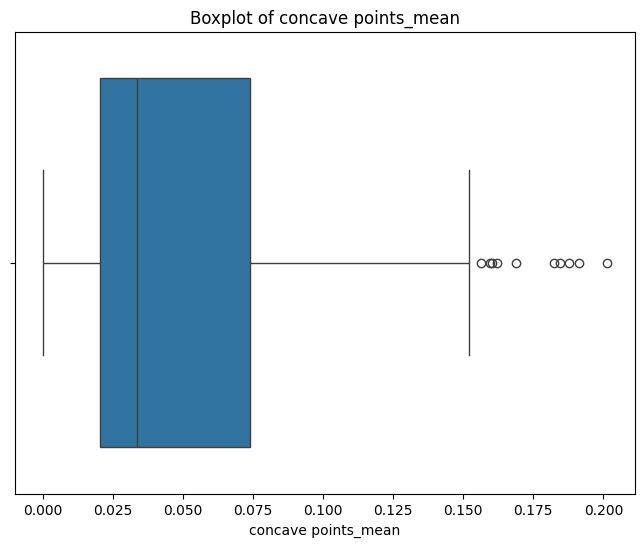

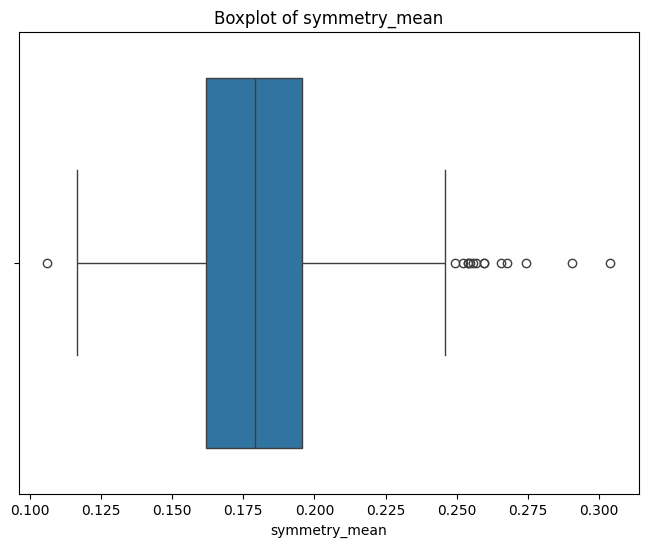

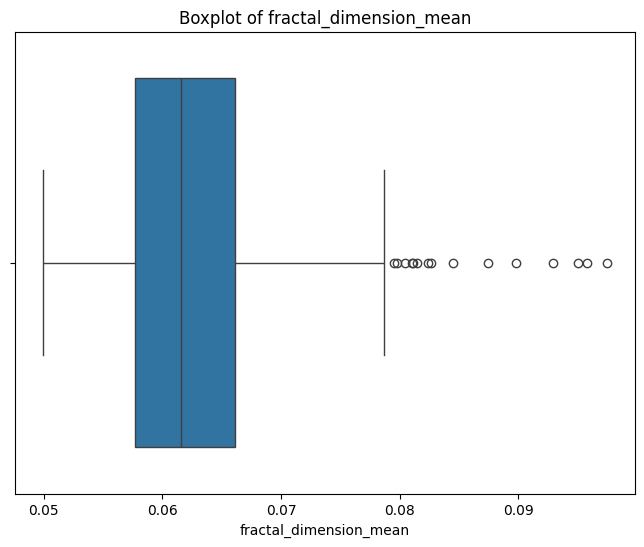

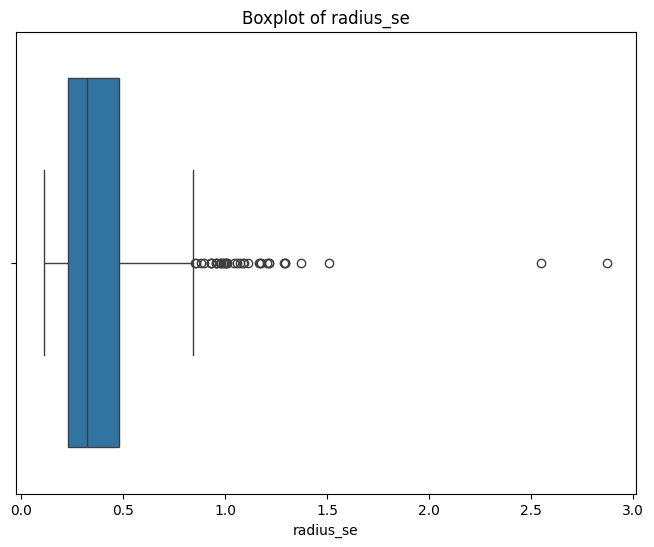

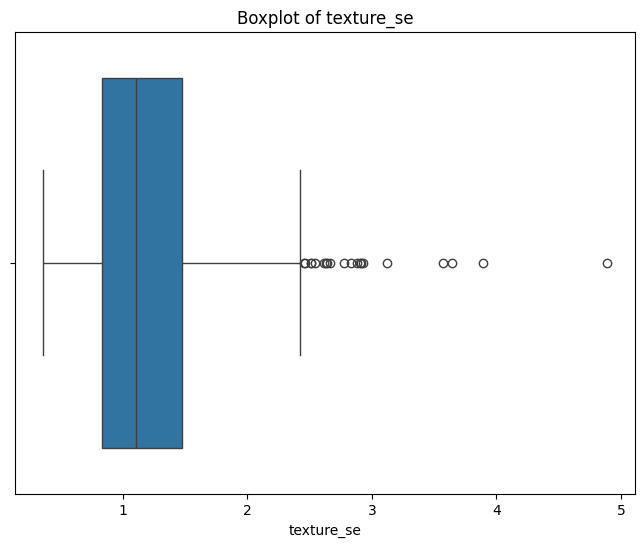

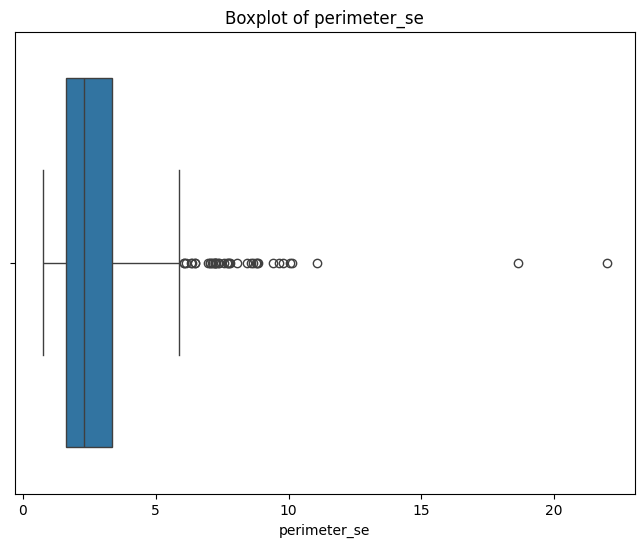

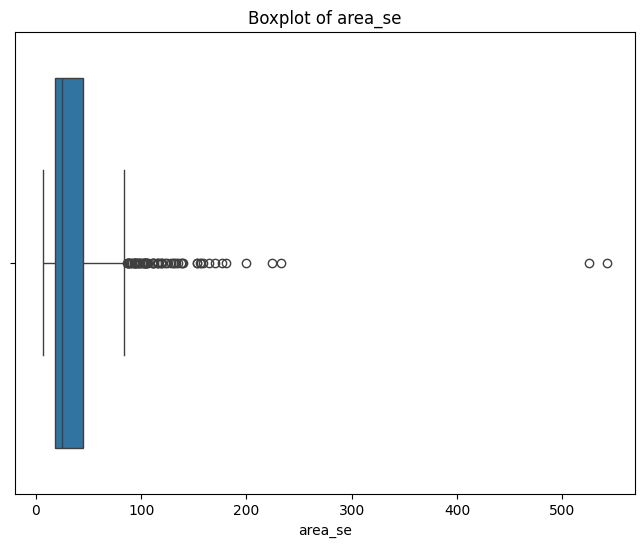

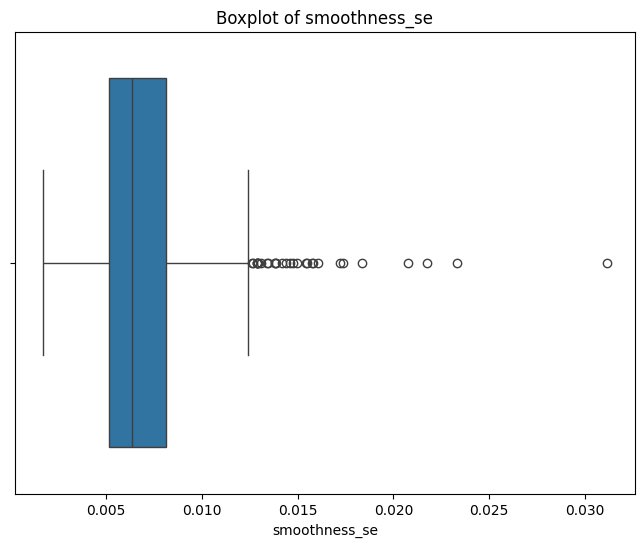

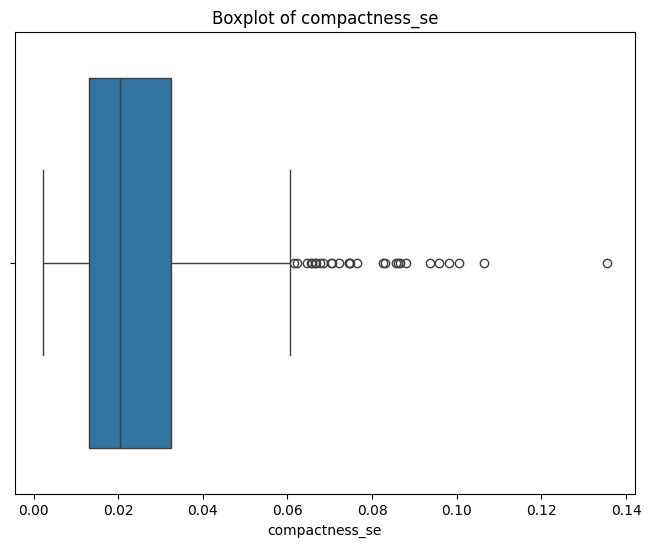

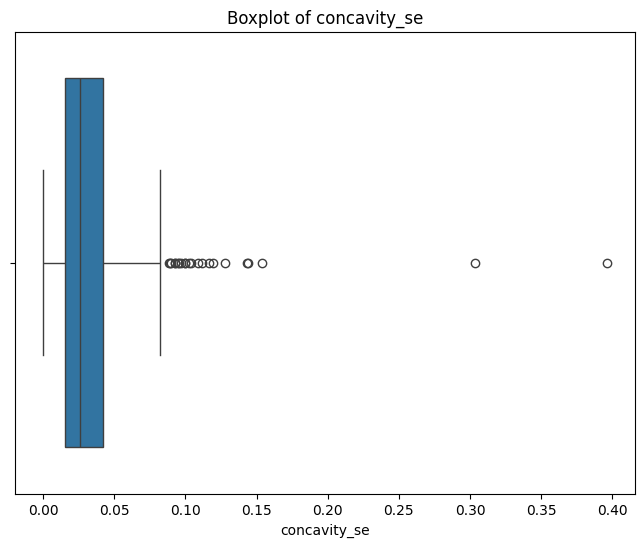

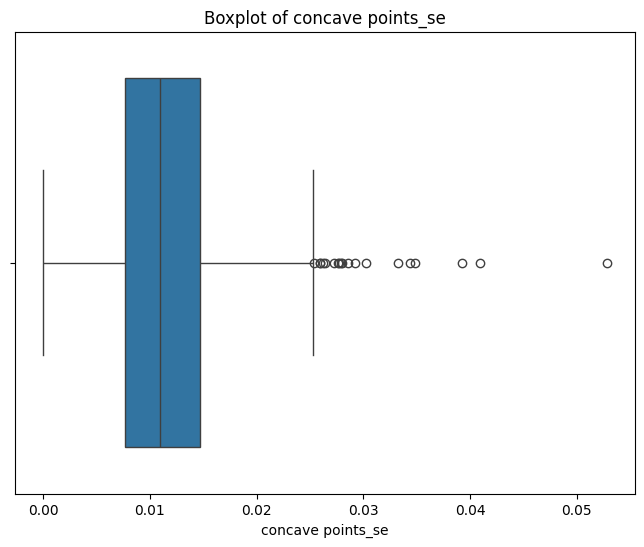

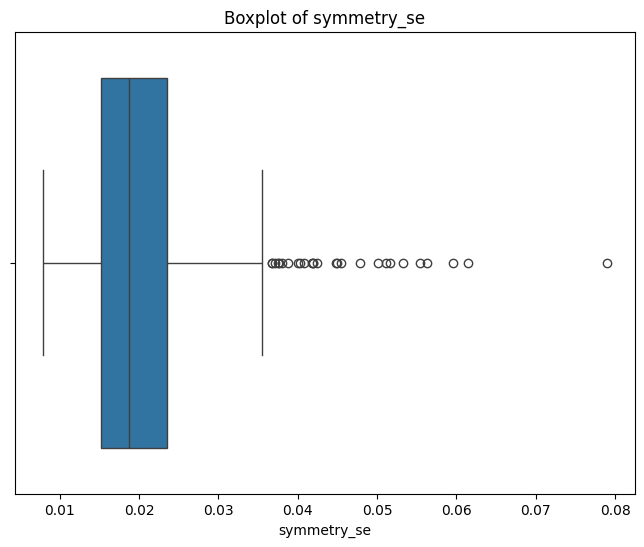

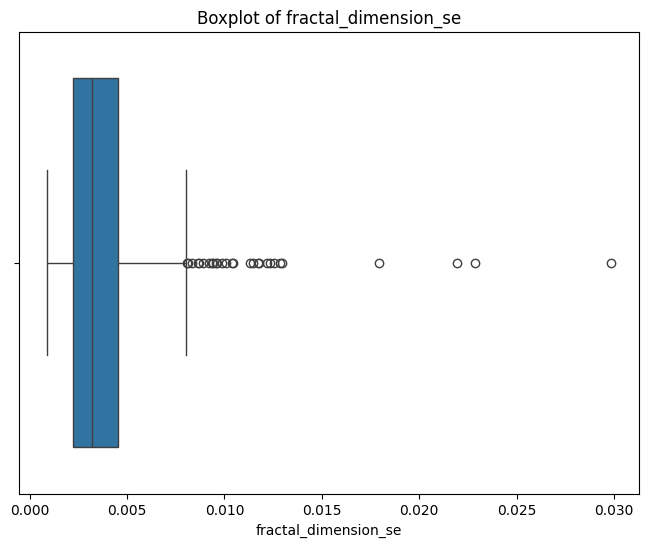

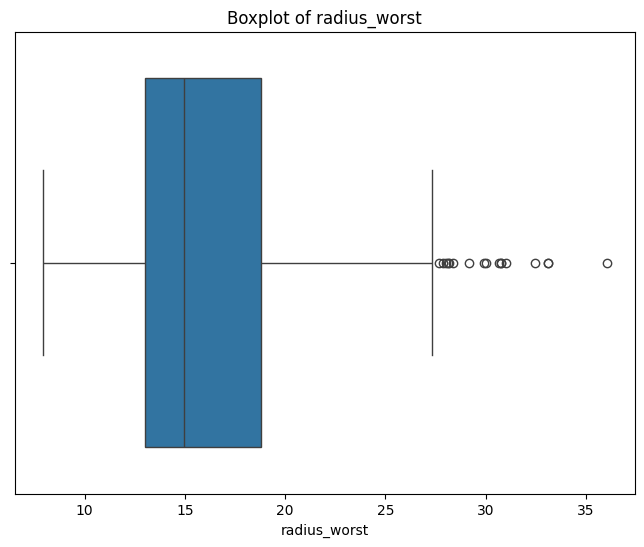

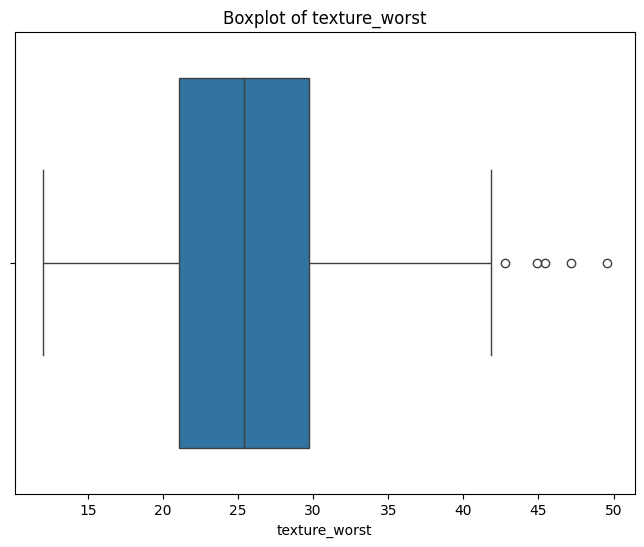

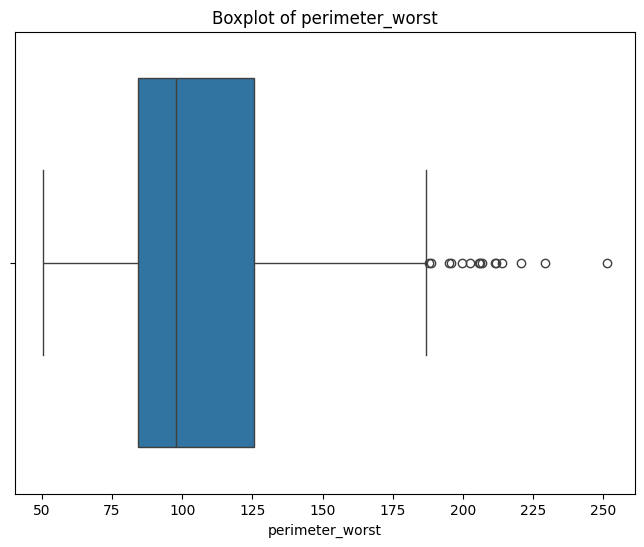

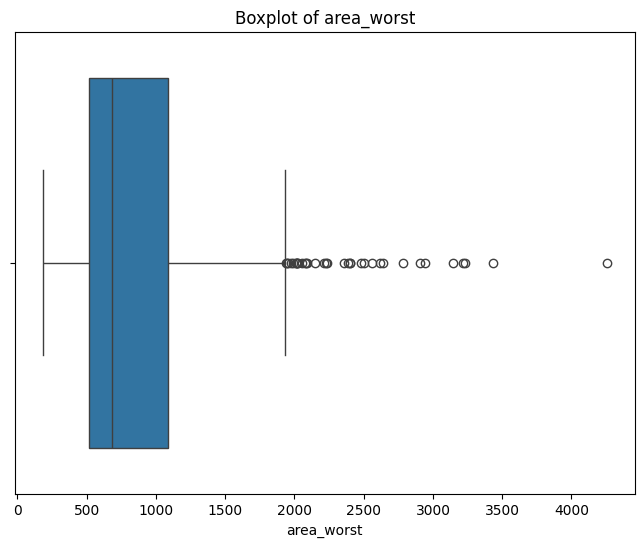

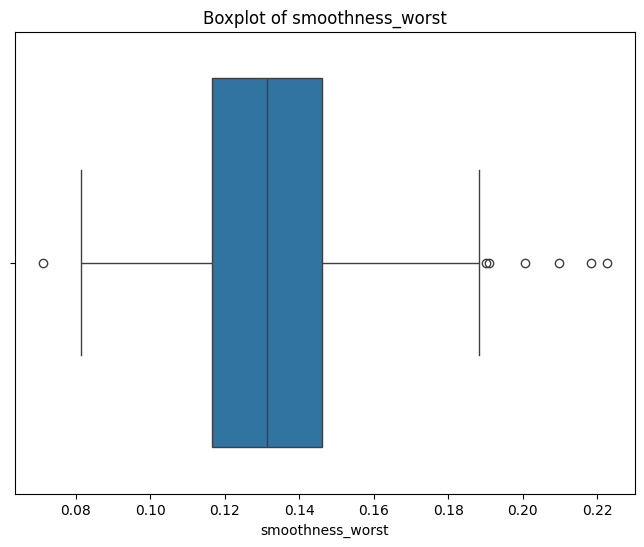

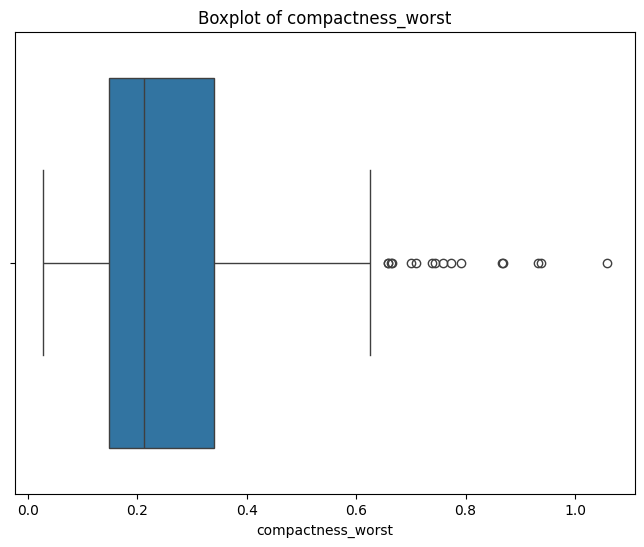

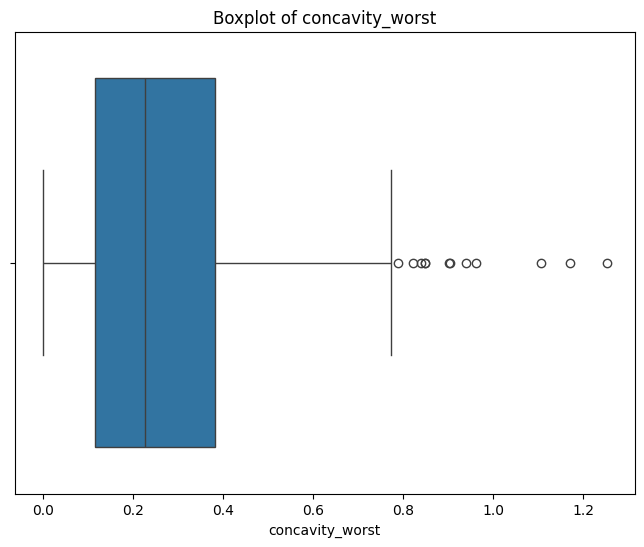

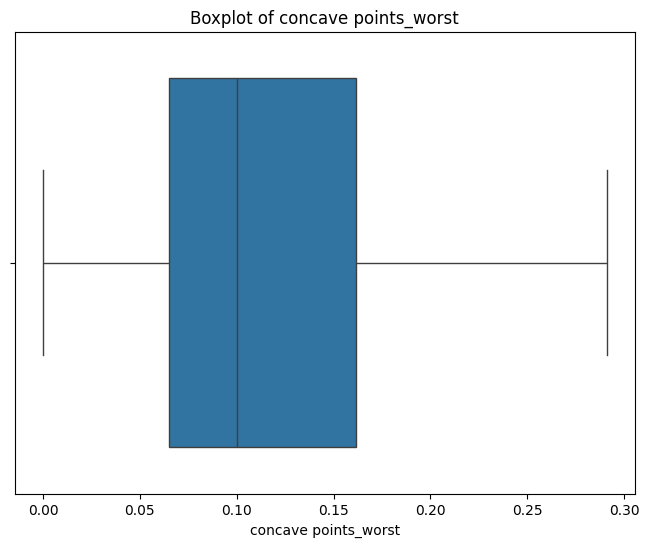

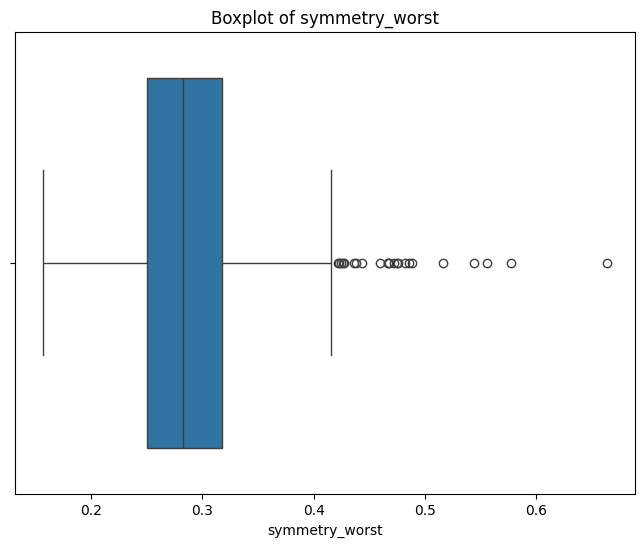

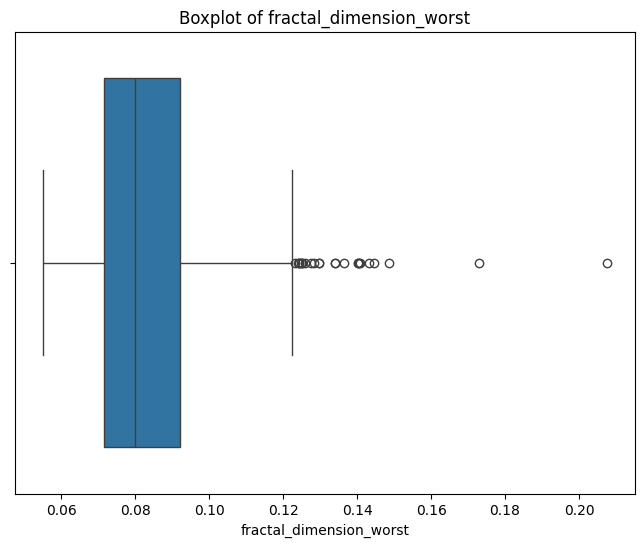

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify outliers in numerical features (excluding 'id' and 'diagnosis')
numerical_features = df.select_dtypes(include=['number'])
numerical_features = numerical_features.drop(columns=['id'])

for col in numerical_features.columns:
    if col != 'diagnosis':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=col, data=df)
        plt.title(f"Boxplot of {col}")
        plt.show()

## Data cleaning

### Subtask:
Handle outliers and missing values in the dataset.


**Reasoning**:
Identify outliers using boxplots and cap them using the IQR method. Then check for missing values and impute them if necessary. Finally, validate the changes by examining updated boxplots and summary statistics.



Missing values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


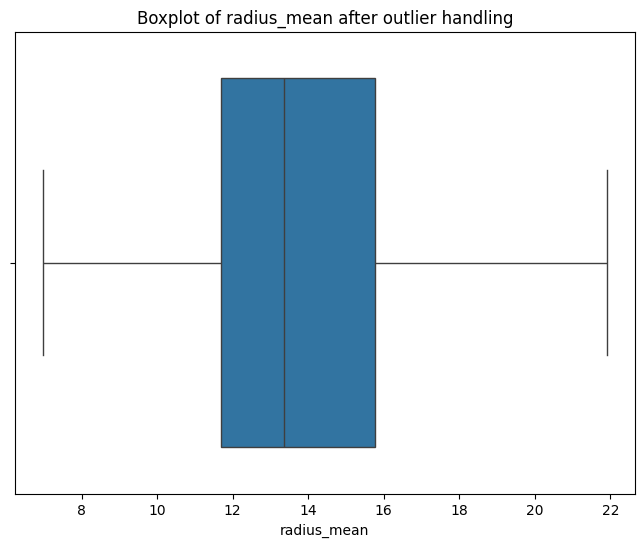

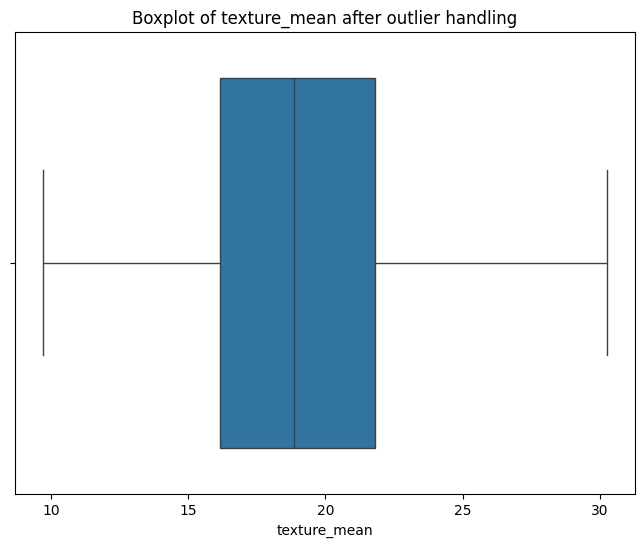

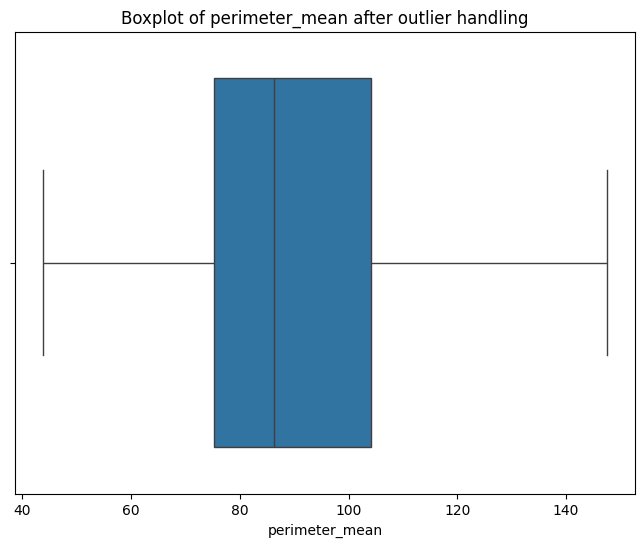

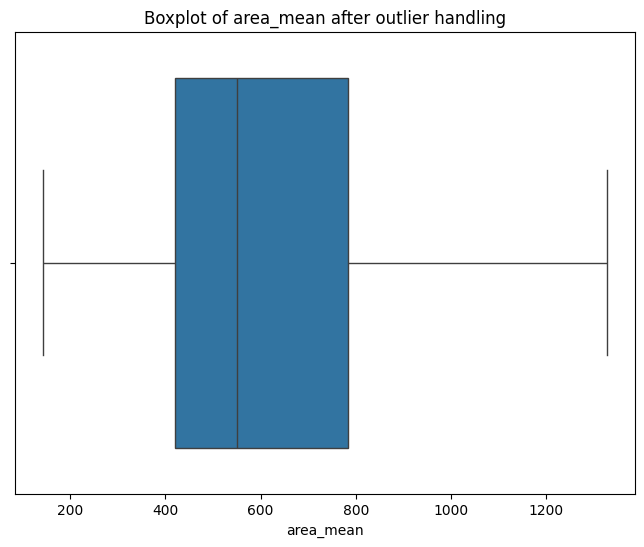

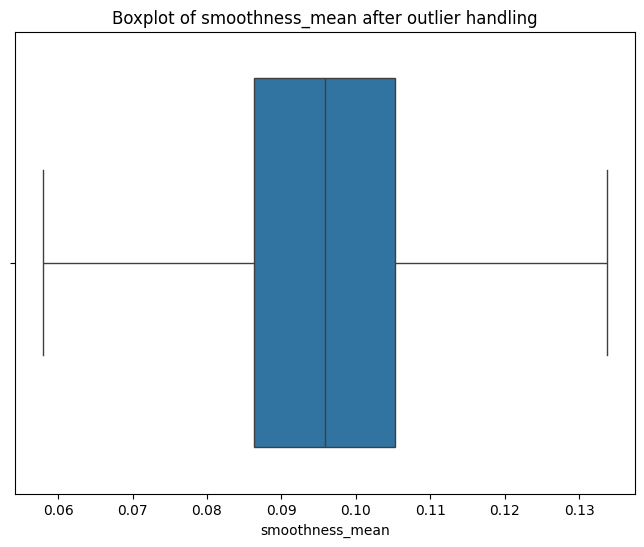

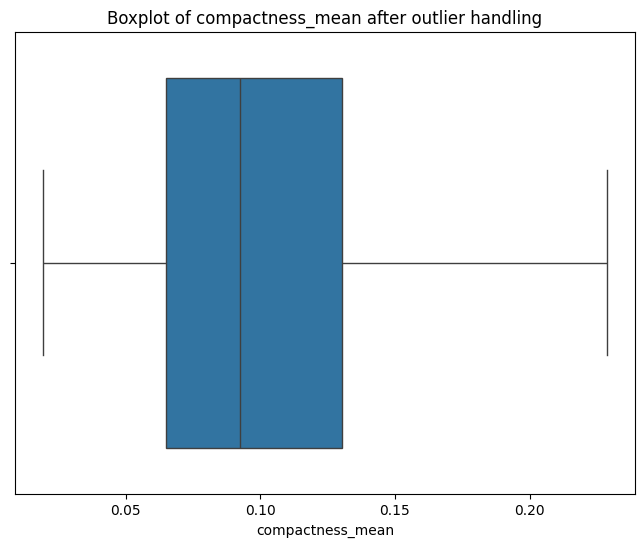

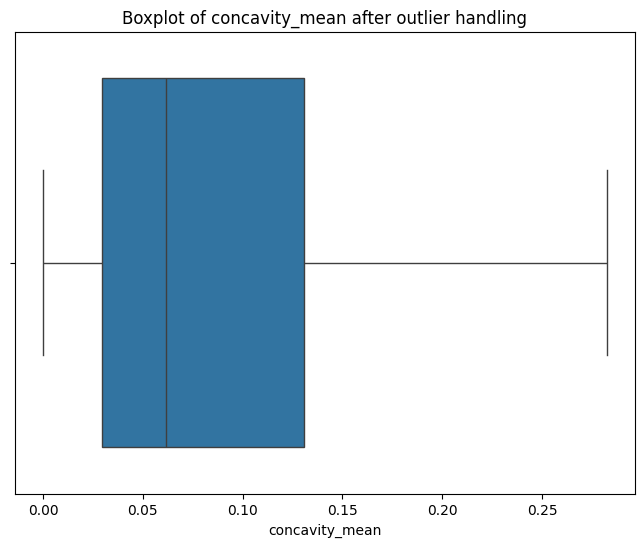

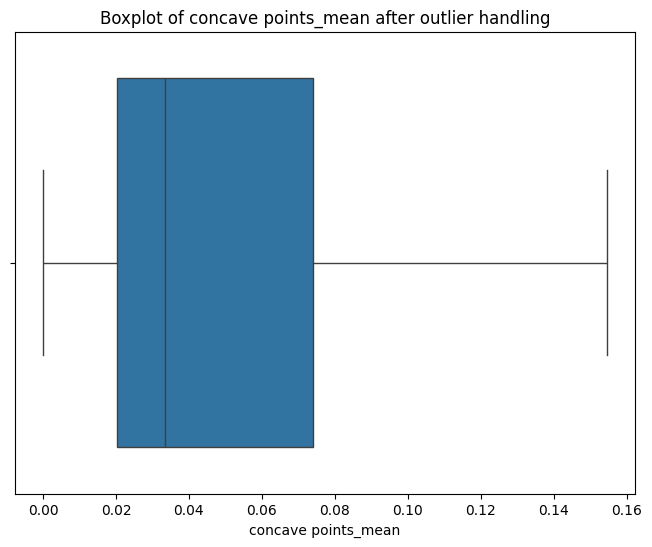

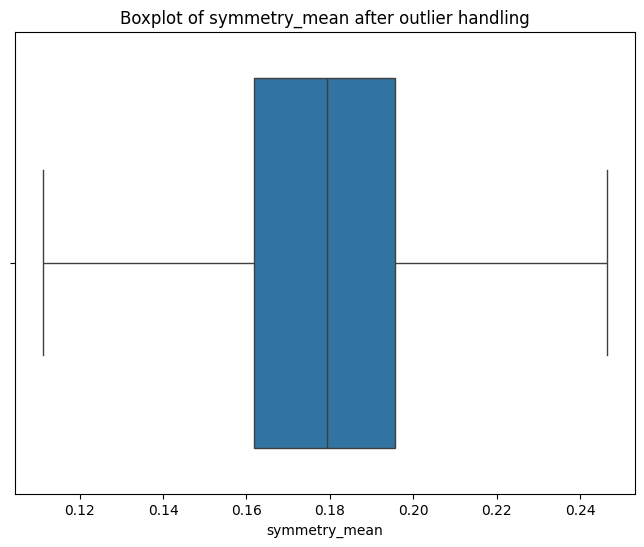

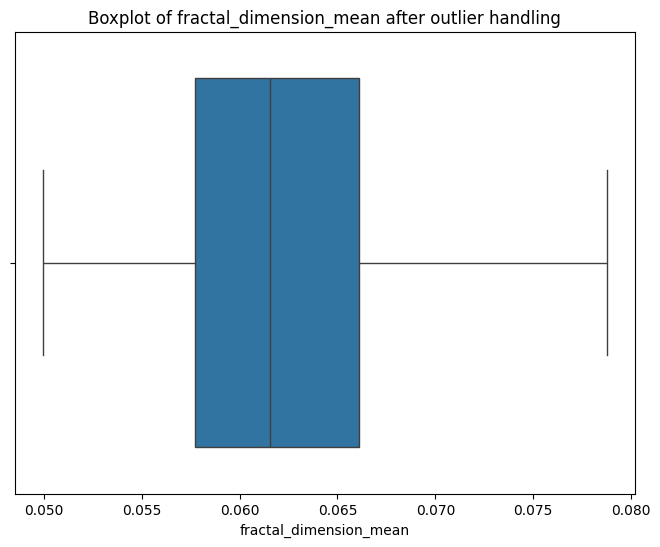

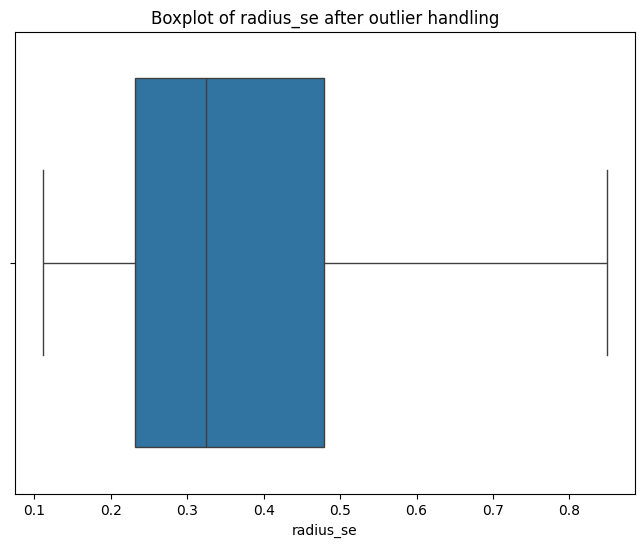

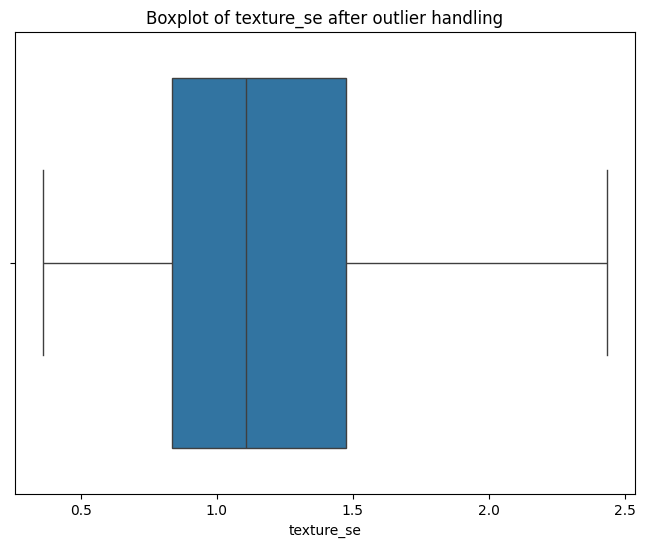

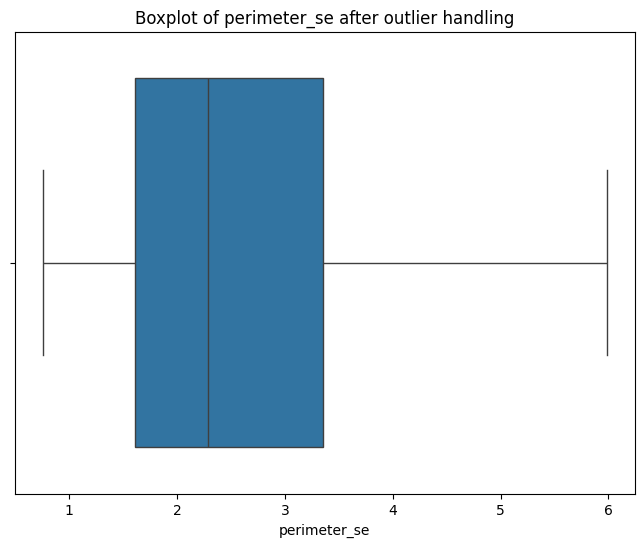

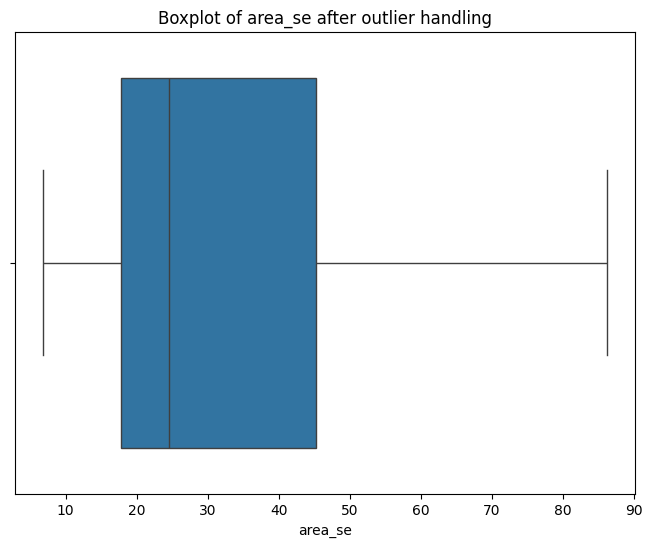

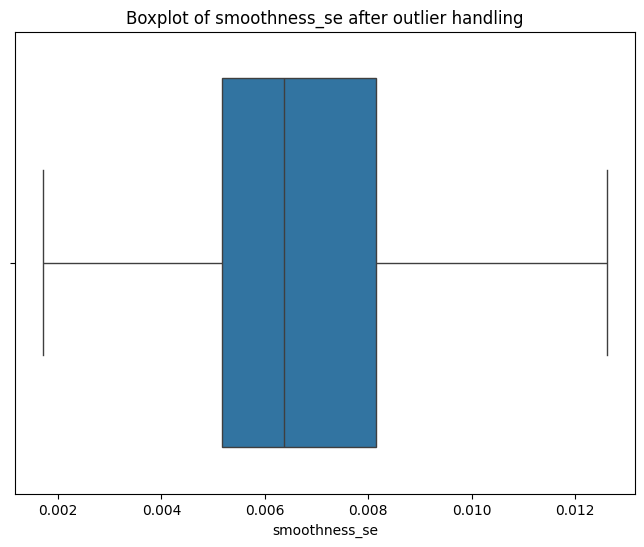

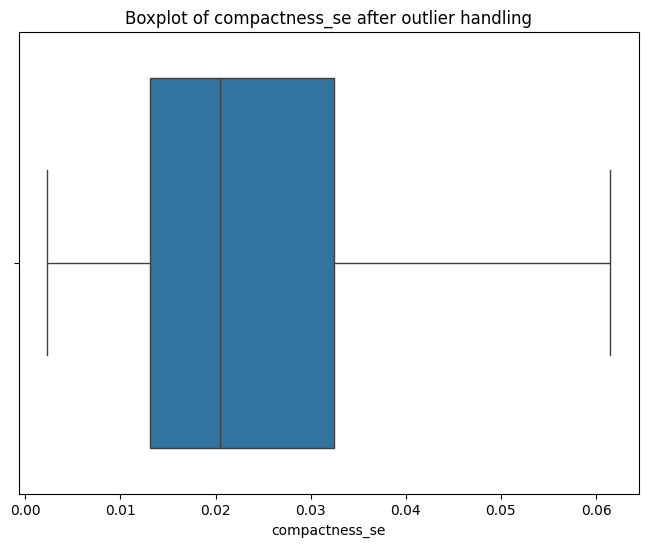

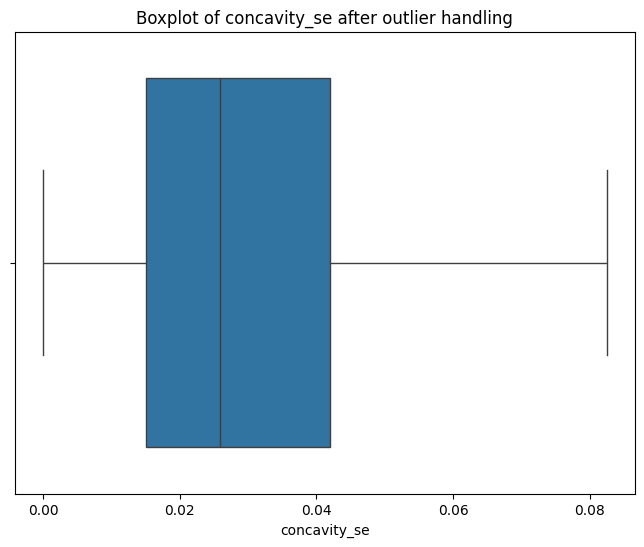

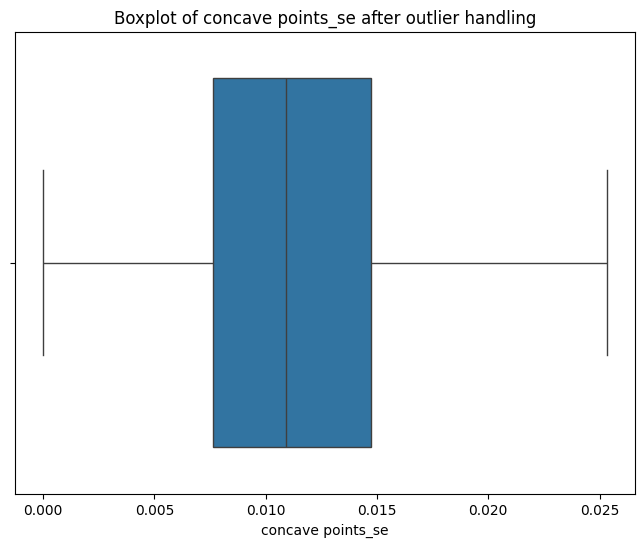

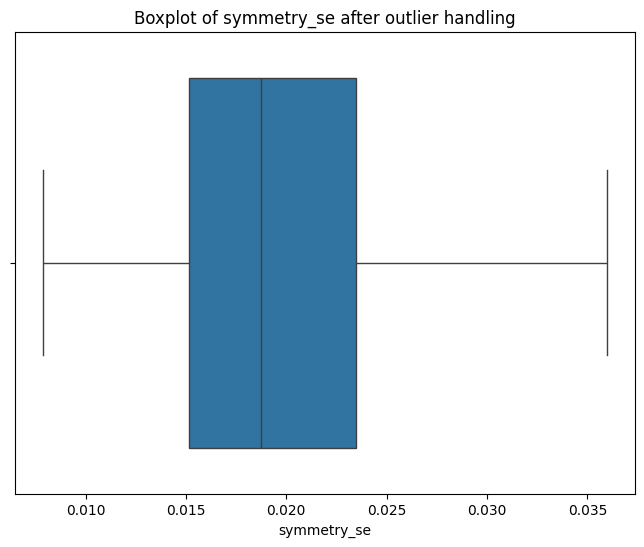

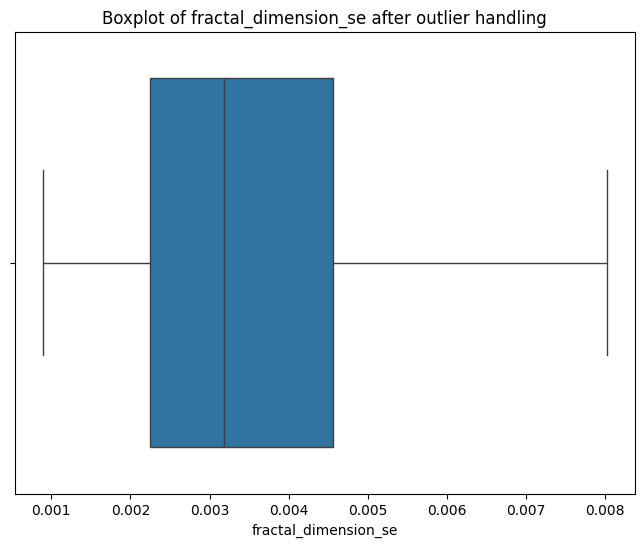

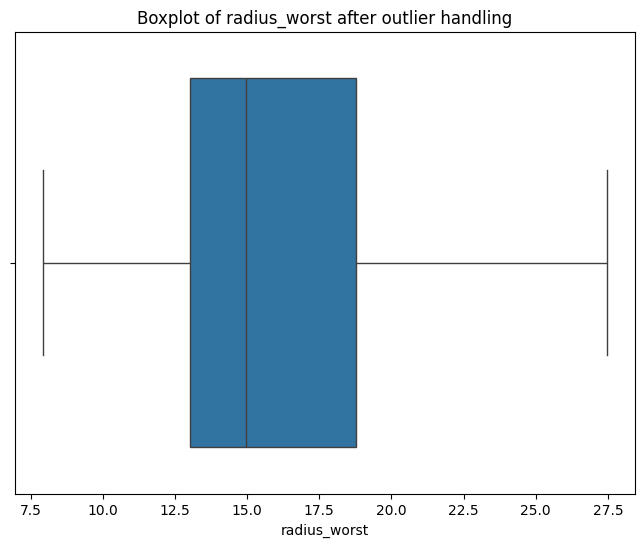

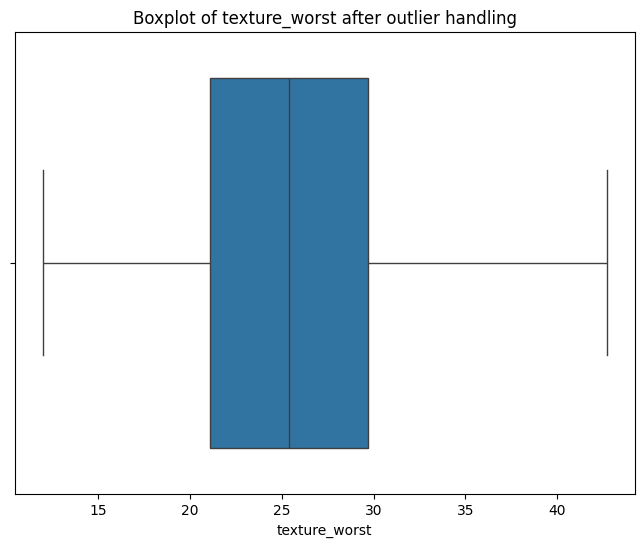

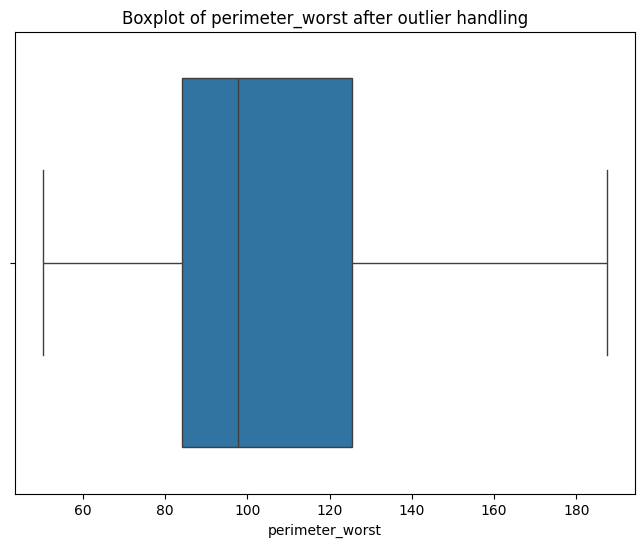

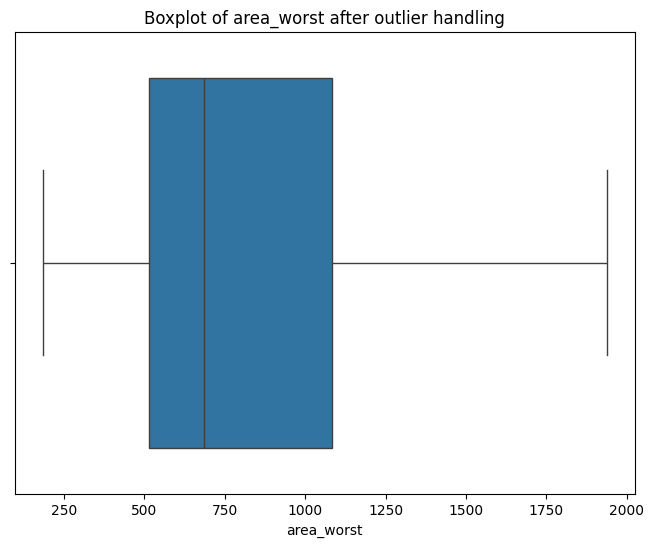

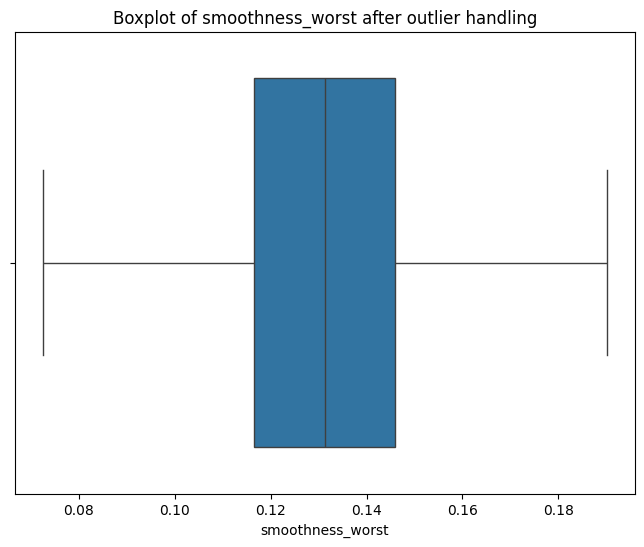

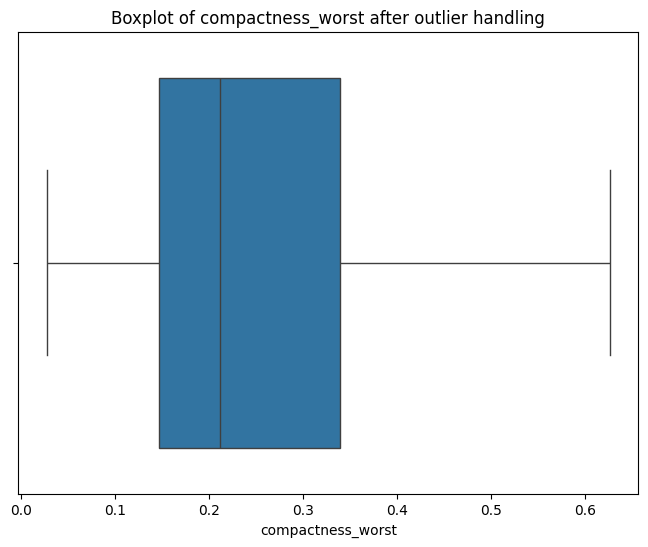

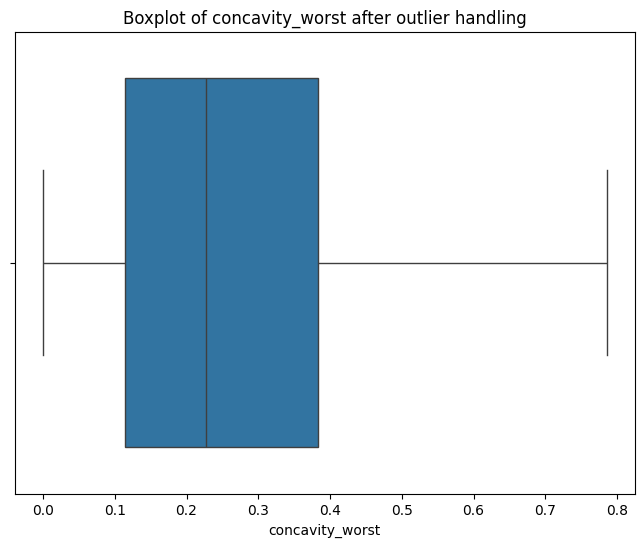

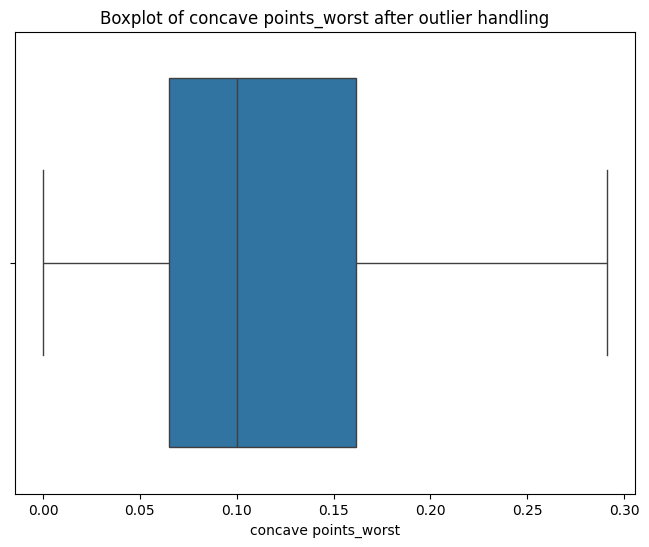

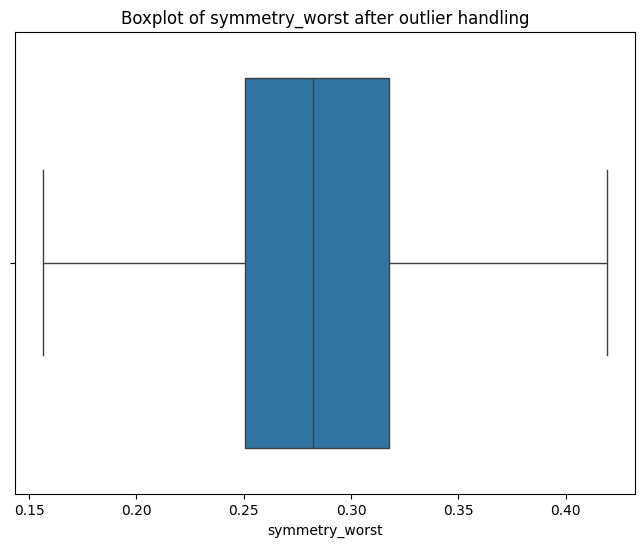

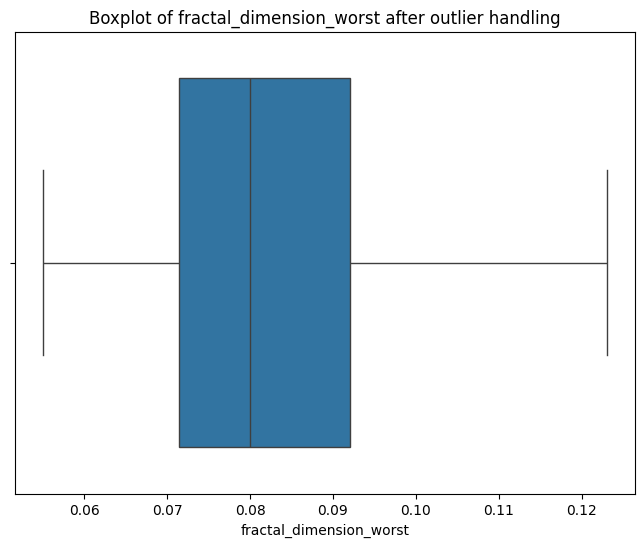


Descriptive Statistics after outlier handling:
        radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify outliers using boxplots and cap them using the IQR method
numerical_features = df.select_dtypes(include=['number']).drop(columns=['id'])
for col in numerical_features.columns:
    if col != 'diagnosis':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Check for missing values and impute them if necessary
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# No missing values found, so no imputation needed.

# Validate the changes
for col in numerical_features.columns:
  if col != 'diagnosis':
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f"Boxplot of {col} after outlier handling")
    plt.show()

print("\nDescriptive Statistics after outlier handling:\n", numerical_features.describe())

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Separate features (X) and target variable (y)
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

# Convert target variable to numerical labels
y = y.map({'B': 0, 'M': 1})

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)


In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Store the best estimator
best_logreg_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.9963880288957687


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_logreg_model, X_train, y_train, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean cross-validation AUC: {cv_scores.mean():.4f}")
print(f"Std. dev. cross-validation AUC: {cv_scores.std():.4f}")

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test)

# Calculate metrics on the test set
try:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f"\nTest set accuracy: {accuracy:.4f}")
    print(f"Test set precision: {precision:.4f}")
    print(f"Test set recall: {recall:.4f}")
    print(f"Test set F1-score: {f1:.4f}")
    print(f"Test set AUC: {auc:.4f}")

except ValueError as e:
    print(f"\nError calculating metrics: {e}")

Cross-validation AUC scores: [0.99793602 1.         0.98968008 0.999484   0.99484004]
Mean cross-validation AUC: 0.9964
Std. dev. cross-validation AUC: 0.0038

Test set accuracy: 0.9737
Test set precision: 0.9756
Test set recall: 0.9524
Test set F1-score: 0.9639
Test set AUC: 0.9692
